# A Web Scraping Journey into LEGO® Jurassic World and Technic

# Introduction

In this project, two main tasks are completed, web scraping and data analysis. 

The first part is web scraping from the Lego website to receive the data related to Lego products. In this step, two libraries in python, requests and json, were used to execute web scraping from the backend of Lego official website. After being scraped, the data was saved as csv file. For analysis purposes, I chose to get the data for products of two themes, Jurassic World and Technic. Four requests were sent to scrap the data and then the data was written into csv files.

The second part is the analysis and visualization of scraped data. Some basic statistics were collected after the preprocessing of data. Tables, visuals such as heatmap, scatter plot, bar chart, line chart, pie chart, box plot were shown to see the correlation between variables and the density of Age, Price, and so on.


### Web Scraping

In [2]:
#import libraries
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas import json_normalize
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Scraping the data for Jurassic World, save data

url1 = "https://www.lego.com/api/graphql/SearchProductsQuery"
payload1 = "{\"query\":\"query SearchProductsQuery($searchSessionId: Int, $q: String!, $page: Int!, $perPage: Int!, $sort: SortInput, $filters: [Filter!], $visibility: ProductVisibility, $offset: Int) {\\n  searchProducts(\\n    searchSession: $searchSessionId\\n    query: $q\\n    page: $page\\n    perPage: $perPage\\n    filters: $filters\\n    sort: $sort\\n    visibility: $visibility\\n  ) {\\n    ... on RedirectAction {\\n      __typename\\n      url\\n    }\\n    ... on SearchProducts {\\n      __typename\\n      productResult {\\n        count\\n        total\\n        results {\\n          ...Product_ProductItem\\n          __typename\\n        }\\n        facets {\\n          ...Facet_FacetSidebar\\n          __typename\\n        }\\n        sortOptions {\\n          ...Sort_SortOptions\\n          __typename\\n        }\\n        __typename\\n      }\\n      resultFor\\n      noResultContent {\\n        id\\n        title\\n        overrideCopy\\n        contentBody {\\n          ...ContentContainerData_WithProductListingSections\\n          __typename\\n        }\\n        __typename\\n      }\\n      experiment {\\n        testId\\n        variantId\\n        __typename\\n      }\\n      resultId\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Product_ProductItem on Product {\\n  __typename\\n  id\\n  productCode\\n  name\\n  slug\\n  primaryImage(size: THUMBNAIL)\\n  baseImgUrl: primaryImage\\n  additionalImages {\\n    url\\n    tag\\n    __typename\\n  }\\n  listingImages: listingAssets(type: IMAGE, limit: 2) {\\n    ... on ListingProductAsset {\\n      id\\n      tag\\n      url\\n      thumbnailDimensions {\\n        height\\n        width\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  overrideUrl\\n  ... on ReadOnlyProduct {\\n    readOnlyVariant {\\n      ...Variant_ReadOnlyProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on SingleVariantProduct {\\n    variant {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on MultiVariantProduct {\\n    priceRange {\\n      formattedPriceRange\\n      formattedListPriceRange\\n      __typename\\n    }\\n    variants {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Variant_ListingProduct on ProductVariant {\\n  id\\n  sku\\n  salePercentage\\n  attributes {\\n    rating\\n    maxOrderQuantity\\n    availabilityStatus\\n    availabilityText\\n    vipAvailabilityStatus\\n    vipAvailabilityText\\n    canAddToBag\\n    canAddToWishlist\\n    vipCanAddToBag\\n    onSale\\n    isNew\\n    ageRange\\n    pieceCount\\n    safetyWarning {\\n      safetyWarningKey: key\\n      safetyWarningLabel: label\\n      showSafetyImage\\n      imageKey\\n      __typename\\n    }\\n    ...ProductAttributes_Flags\\n    __typename\\n  }\\n  ...ProductVariant_Pricing\\n  __typename\\n}\\n\\nfragment ProductVariant_Pricing on ProductVariant {\\n  price {\\n    formattedAmount\\n    centAmount\\n    currencyCode\\n    formattedValue\\n    __typename\\n  }\\n  listPrice {\\n    formattedAmount\\n    centAmount\\n    __typename\\n  }\\n  attributes {\\n    onSale\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ProductAttributes_Flags on ProductAttributes {\\n  featuredFlags {\\n    key\\n    label\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Variant_ReadOnlyProduct on ReadOnlyVariant {\\n  id\\n  sku\\n  attributes {\\n    featuredFlags {\\n      key\\n      label\\n      __typename\\n    }\\n    ageRange\\n    pieceCount\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Facet_FacetSidebar on Facet {\\n  name\\n  key\\n  id\\n  isDefaultActive\\n  labels {\\n    __typename\\n    displayMode\\n    name\\n    labelKey\\n    count\\n    ... on FacetValue {\\n      value\\n      __typename\\n    }\\n    ... on FacetRange {\\n      from\\n      to\\n      __typename\\n    }\\n  }\\n  __typename\\n}\\n\\nfragment Sort_SortOptions on SortOptions {\\n  id\\n  key\\n  direction\\n  label\\n  analyticLabel\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithProductListingSections on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on ProductSection {\\n      removePadding\\n      filterName\\n      filterValue\\n      ... on DisruptorProductSection {\\n        ...DisruptorSection\\n        __typename\\n      }\\n      products(\\n        perPage: $perPage\\n        page: $page\\n        sort: $sort\\n        filters: $filters\\n        searchSession: $searchSessionId\\n        offset: $offset\\n      ) {\\n        ...ProductListings\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorSection on DisruptorProductSection {\\n  disruptor {\\n    ...DisruptorData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorData on Disruptor {\\n  __typename\\n  imageSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  contrast\\n  background\\n  title\\n  description\\n  link\\n  openInNewTab\\n}\\n\\nfragment ImageAsset on ImageAssetDetails {\\n  url\\n  width\\n  height\\n  maxPixelDensity\\n  format\\n  __typename\\n}\\n\\nfragment ProductListings on ProductQueryResult {\\n  resultId\\n  count\\n  offset\\n  perPage\\n  total\\n  optimizelyExperiment {\\n    testId\\n    variantId\\n    __typename\\n  }\\n  fetchDisruptorsOnClient\\n  reservedSlots\\n  results {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  facets {\\n    ...Facet_FacetSidebar\\n    __typename\\n  }\\n  sortOptions {\\n    ...Sort_SortOptions\\n    __typename\\n  }\\n  disruptors {\\n    ...DisruptorStatic\\n    ...DisruptorPopupVideo\\n    ...DisruptorInteractive\\n    __typename\\n  }\\n  promotion {\\n    ...PromotionSectionData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorStatic on DisruptorStatic {\\n  __typename\\n  contentType\\n  title\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  isDouble\\n  description\\n  url\\n  callToActionText\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorInteractive on DisruptorInteractive {\\n  __typename\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  url\\n  callToActionText\\n  contentType\\n  videoMedia {\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  thumbnailImage {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorPopupVideo on DisruptorPopupVideo {\\n  __typename\\n  contentType\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  popupVideo {\\n    subtitlesUrl\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment BaseContentContainer on ContentContainer {\\n  id\\n  multivariate {\\n    experimentId\\n    entityId\\n    testingId\\n    inExperimentAudience\\n    __typename\\n  }\\n  targeting {\\n    fetchOnClient\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment BaseContentSection on ContentSection {\\n  __typename\\n  id\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  ...CarouselContentSection\\n  ...CustomCarouselContentSection\\n  ...UserGeneratedContentData\\n  ...AccordionSectionData\\n  ...BreadcrumbSection\\n  ...CategoryListingSection\\n  ...ListingBannerSection\\n  ...CardContentSection\\n  ...CardCarouselSection\\n  ...CopyContent\\n  ...CopySectionData\\n  ...QuickLinksData\\n  ...ContentBlockMixedData\\n  ...HeroBannerData\\n  ...MotionBannerData\\n  ...MotionSidekickData\\n  ...InPageNavData\\n  ...GalleryData\\n  ...TableData\\n  ...CountdownBannerData\\n  ...RecommendationSectionData\\n  ...SidekickBannerData\\n  ...TextBlockData\\n  ...TextBlockSEOData\\n  ...CrowdTwistWidgetSection\\n  ...CrowdTwistToggleWidgetSection\\n  ...CrowdTwistCodeRedemptionBanner\\n  ...CodedSection\\n  ...GridSectionData\\n  ...StickyCTAData\\n  ...AudioSectionData\\n  ...MotionSidekick1x1Data\\n  ...ImageTransitionSliderData\\n  ...ImageXrayViewerData\\n  ...PollsSectionData\\n  ...ArtNavigationData\\n  ...MotionBanner16x9Data\\n  ...QuickLinksAdvancedData\\n  ...ArticleSectionData\\n  ...RelatedArticleSectionData\\n  ...FeatureExplorerSectionData\\n  ...IdeaGeneratorSectionData\\n  ...TabbedContentExplorerData\\n  ...CustomProductCarousel_UniqueFields\\n  ...CustomProductCarousel_ItemFields\\n  ...CardContentRTWData\\n  ...ExpandedCardContentData\\n  ...ArticleTextData\\n  ...ArticleImageSectionData\\n  ...ExpandedProductLeafData\\n  ...Dots3DSectionData\\n  ...NinetiethAnniversaryExperienceData\\n  ...ArticleGroupSectionData\\n  ...MotionBannerSectionData\\n  ...AdvancedProductHeroBannerSectionData\\n  ...PlayTypeDetectorSectionData\\n  ...SocialShareSectionData\\n  ...EcosystemJourneyStarterData\\n  ...ResultsBannerSectionData\\n  ...CharacterExplorerSectionData\\n  ...SubmissionFormBannerSectionData\\n  ...RebuildTheWorld2023Data\\n  ...PromotionSectionData\\n}\\n\\nfragment CarouselContentSection on ContentSection {\\n  ... on ProductCarouselSection {\\n    ...ProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CustomCarouselContentSection on ContentSection {\\n  ... on CustomProductCarouselSection {\\n    ...CustomProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...CustomProductCarousel_ItemFields\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AccordionSectionData on AccordionSection {\\n  __typename\\n  id\\n  title\\n  showTitle\\n  schema\\n  accordionBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n}\\n\\nfragment BreadcrumbSection on BreadcrumbSection {\\n  ...BreadcrumbDynamicSection\\n  __typename\\n}\\n\\nfragment BreadcrumbDynamicSection on BreadcrumbSection {\\n  breadcrumbs {\\n    label\\n    url\\n    analyticsTitle\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ListingBannerSection on ListingBannerSection {\\n  ...ListingBanner\\n  __typename\\n}\\n\\nfragment ListingBanner on ListingBannerSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  description\\n  contrast\\n  logoImage\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CategoryListingSection on CategoryListingSection {\\n  ...CategoryListing\\n  __typename\\n}\\n\\nfragment CategoryListing on CategoryListingSection {\\n  title\\n  description\\n  thumbnailImage\\n  children {\\n    ...CategoryLeafSection\\n    __typename\\n  }\\n  hasCustomContent\\n  __typename\\n}\\n\\nfragment CategoryLeafSection on CategoryListingChildren {\\n  title\\n  description\\n  thumbnailImage\\n  logoImage\\n  url\\n  ageRange\\n  tag\\n  thumbnailSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  doesNotHaveAnAboutPage\\n  __typename\\n}\\n\\nfragment CardContentSection on CardContentSection {\\n  ...CardContent\\n  __typename\\n}\\n\\nfragment CardContent on CardContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment VideoAssetFragment on VideoMedia {\\n  url\\n  id\\n  isLiveStream\\n  subtitlesUrl\\n  __typename\\n}\\n\\nfragment CardCarouselSection on CardCarouselSection {\\n  ...CardCarouselContent\\n  __typename\\n}\\n\\nfragment CardCarouselContent on CardCarouselSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopyContent on CopyContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  blocks {\\n    title\\n    body\\n    textAlignment\\n    titleColor\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopySectionData on CopySection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  showTitle\\n  body\\n  __typename\\n}\\n\\nfragment QuickLinksData on QuickLinkSection {\\n  title\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  quickLinks {\\n    title\\n    isH1\\n    link\\n    openInNewTab\\n    contrast\\n    altText\\n    imageSrcUrl\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentBlockMixedData on ContentBlockMixed {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  blocks {\\n    title\\n    isH1\\n    description\\n    backgroundColor\\n    blockTheme\\n    contentPosition\\n    logoURL\\n    secondaryLogoURL\\n    logoPosition\\n    callToActionText\\n    callToActionLink\\n    altText\\n    backgroundImages {\\n      largeImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      smallImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment UserGeneratedContentData on UserGeneratedContent {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  ugcBlock {\\n    title\\n    text\\n    ugcType\\n    ugcKey\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment HeroBannerData on HeroBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  heroblocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentVerticalPosition\\n    contentHorizontalPosition\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionOpenInNewTab\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionAccountAction\\n    callToActionReturnUrl\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionAccountAction\\n    secondaryCallToActionReturnUrl\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    showEmailSignupForm\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment GalleryData on Gallery {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  galleryblocks {\\n    id\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerData on MotionBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekickData on MotionSidekick {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment InPageNavData on InPageNav {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  inPageNavBlocks {\\n    id\\n    title\\n    isH1\\n    text\\n    contrast\\n    primaryLogoSrc\\n    secondaryLogoSrc\\n    animatedMedia\\n    videoMedia {\\n      url\\n      id\\n      subtitlesUrl\\n      __typename\\n    }\\n    contentBackground\\n    backgroundImages {\\n      small\\n      medium\\n      large\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TableData on TableSection {\\n  rows {\\n    isHeadingRow\\n    cells\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RecommendationSectionData on RecommendationSection {\\n  __typename\\n  title\\n  showTitle\\n  recommendationType\\n}\\n\\nfragment SidekickBannerData on SidekickBanner {\\n  __typename\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  sidekickBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    logoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    ctaTextPrimary: ctaText\\n    ctaLinkPrimary: ctaLink\\n    ctaOpenInNewTab\\n    ctaUseAnalyticsPrimary: ctaUseAnalytics\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    ctaTextSecondary\\n    ctaLinkSecondary\\n    ctaOpenInNewTabSecondary\\n    ctaUseAnalyticsSecondary\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    contentHeight\\n    bgImages {\\n      large\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n}\\n\\nfragment ProductCarousel_UniqueFields on ProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n}\\n\\nfragment TextBlockData on TextBlock {\\n  textBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    callToActionLink\\n    callToActionText\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionLink\\n    secondaryCallToActionText\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TextBlockSEOData on TextBlockSEO {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  textBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CrowdTwistWidgetSection on CrowdTwistWidgetSection {\\n  __typename\\n  id\\n  heading\\n  activityId\\n  rewardId\\n  defaultOpen\\n}\\n\\nfragment CrowdTwistToggleWidgetSection on CrowdTwistToggleWidgetSection {\\n  __typename\\n  defaultOpen\\n  firstStepDescription\\n  firstStepHeading\\n  id\\n  secondStepHeading\\n  heading\\n  radioButtons {\\n    activityId\\n    buttonLabel\\n    rewardId\\n    __typename\\n  }\\n  isVipBannerVisible\\n}\\n\\nfragment CrowdTwistCodeRedemptionBanner on CrowdTwistCodeRedemptionBanner {\\n  __typename\\n  heading\\n  description\\n  buttonText\\n  inputLabel\\n  campaignId\\n  groupCampaignId\\n  imageUrl\\n}\\n\\nfragment CodedSection on CodedSection {\\n  __typename\\n  id\\n  componentName\\n  properties {\\n    key\\n    value\\n    __typename\\n  }\\n  text {\\n    key\\n    value\\n    __typename\\n  }\\n  media {\\n    key\\n    values {\\n      id\\n      contentType\\n      fileSize\\n      filename\\n      url\\n      title\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment GridSectionData on GridSection {\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  items {\\n    id\\n    image\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    href\\n    text\\n    textContrast\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AudioSectionData on AudioSection {\\n  tracks {\\n    trackArt {\\n      ...ImageAsset\\n      __typename\\n    }\\n    src\\n    title\\n    description\\n    __typename\\n  }\\n  backgroundColor\\n  textContrast\\n  backgroundImage {\\n    mobile {\\n      ...ImageAsset\\n      __typename\\n    }\\n    desktop {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  seriesTitle\\n  seriesThumbnail {\\n    ...ImageAsset\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment StickyCTAData on StickyCTASection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  item {\\n    backgroundColor\\n    ctaBackgroundImage\\n    ctaPosition\\n    href\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    text\\n    textAlign\\n    textContrast\\n    effect\\n    delay\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekick1x1Data on MotionSidekick1x1 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    description\\n    textContrast\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    inlineVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    fullVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoHorizontalPosition\\n    backgroundColor\\n    primaryCallToActionText\\n    primaryCallToActionLink\\n    primaryCallToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageTransitionSliderData on ImageTransitionSlider {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageTransitionSliderBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageXrayViewerData on ImageXrayViewer {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageXrayViewerBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PollsSectionData on PollsSection {\\n  id\\n  question\\n  backgroundColor\\n  answerFillColor\\n  answerBorderColor\\n  answers {\\n    answer\\n    id\\n    __typename\\n  }\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageAlignment\\n  pollResults {\\n    answers {\\n      answerId\\n      count\\n      __typename\\n    }\\n    totalVotes\\n    __typename\\n  }\\n  showPollResults\\n  submissionConfirmationTitle\\n  submissionConfirmationContent\\n  __typename\\n}\\n\\nfragment ArtNavigationData on ArtNavigation {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  artNavigationBlocks {\\n    id\\n    title\\n    cardTitle\\n    darkMode\\n    callToActionLink\\n    backgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    textImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBanner16x9Data on MotionBanner16x9 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment QuickLinksAdvancedData on QuickLinkAdvancedSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  linkCount\\n  backgroundColor\\n  items {\\n    title\\n    link\\n    openInNewTab\\n    contrast\\n    imageSrc {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    textAlignment\\n    textAlignmentVertical\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleSectionData on ArticleSection {\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  articleBlocks {\\n    id\\n    contentTitle\\n    setAsH1\\n    richText\\n    width\\n    product {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    productAlignment\\n    backgroundColor\\n    contentAlignment\\n    callToActionText\\n    callToActionType\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    caption\\n    captionDarkMode\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RelatedArticleSectionData on RelatedArticleSection {\\n  id\\n  title\\n  articles {\\n    id\\n    title\\n    description\\n    url\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  backgroundColor\\n  showCta\\n  target {\\n    text\\n    href\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment FeatureExplorerSectionData on FeatureExplorerSection {\\n  id\\n  title\\n  showHeader\\n  showHeaderLabel\\n  backgroundGradientColors {\\n    backgroundLightColor\\n    backgroundDarkColor\\n    __typename\\n  }\\n  overlayBackgroundColor\\n  overlayTextColor\\n  accentColor\\n  logo {\\n    image\\n    altText\\n    __typename\\n  }\\n  secondaryLogo {\\n    image\\n    altText\\n    __typename\\n  }\\n  features {\\n    title\\n    text\\n    scene\\n    position {\\n      x\\n      y\\n      __typename\\n    }\\n    video\\n    image\\n    __typename\\n  }\\n  frames\\n  __typename\\n}\\n\\nfragment IdeaGeneratorSectionData on IdeaGeneratorSection {\\n  id\\n  title\\n  previewContent {\\n    title\\n    text\\n    callToActionText\\n    __typename\\n  }\\n  mainContent {\\n    startText\\n    retryText\\n    ideaLimit\\n    unlockThreshold\\n    endText\\n    callToAction {\\n      text\\n      link\\n      openInNewWindow\\n      __typename\\n    }\\n    __typename\\n  }\\n  problems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  multipliers {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  validProblems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TabbedContentExplorerData on TabbedContentExplorerSection {\\n  __typename\\n  id\\n  blocks {\\n    title\\n    backgroundColor\\n    accentColor\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    images {\\n      alt\\n      desktop {\\n        ...ImageAsset\\n        __typename\\n      }\\n      mobile {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment CustomProductCarousel_UniqueFields on CustomProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n  backgroundColor\\n}\\n\\nfragment CustomProductCarousel_ItemFields on CustomProductCarouselItem {\\n  product {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  imageOverride {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageBackgroundColor\\n  contentBackgroundColor\\n  ctaButtonColor\\n  __typename\\n}\\n\\nfragment Countdown on CountdownBannerChild {\\n  title\\n  isH1\\n  text\\n  textPosition\\n  textAlignment\\n  contrast\\n  backgroundColor\\n  callToActionLink\\n  callToActionText\\n  openInNewTab\\n  countdownDate\\n  __typename\\n}\\n\\nfragment CountdownBannerData on CountdownBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  countdownBannerBlocks {\\n    ...Countdown\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CardContentRTWData on CardContentRTWSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  preferCarousel\\n  hasShadow\\n  blocks {\\n    title\\n    description\\n    backgroundColor\\n    textAlignment\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    altText\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ExpandedCardContentData on ExpandedCardContentSection {\\n  isStaggered\\n  darkMode\\n  contentOpacity\\n  contentBackgroundColor\\n  blocks {\\n    id\\n    title\\n    text\\n    darkMode\\n    contentAlignment\\n    desktopBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    mobileBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleTextData on ArticleTextSection {\\n  id\\n  title\\n  richText\\n  textAlignment\\n  __typename\\n}\\n\\nfragment ArticleImageSectionData on ArticleImageSection {\\n  title\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  altText\\n  caption\\n  captionBackground\\n  __typename\\n}\\n\\nfragment ExpandedProductLeafData on ExpandedProductLeafSection {\\n  id\\n  productCode\\n  __typename\\n}\\n\\nfragment Dots3DSectionData on Dots3DSection {\\n  id\\n  isSingleSKU\\n  tiles {\\n    id\\n    color\\n    shape\\n    sticker\\n    sets\\n    ip\\n    rotation\\n    alpha\\n    __typename\\n  }\\n  tiles3D\\n  models {\\n    setId\\n    ip\\n    label\\n    pdpLink\\n    glb\\n    image\\n    zoom {\\n      min\\n      max\\n      start\\n      __typename\\n    }\\n    cameraRotation {\\n      minHorizontal\\n      maxHorizontal\\n      minVertical\\n      maxVertical\\n      __typename\\n    }\\n    rotation\\n    bgColor\\n    bgContrast\\n    backLight\\n    __typename\\n  }\\n  home {\\n    title\\n    heading\\n    body\\n    selectButtonText\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    __typename\\n  }\\n  decorate {\\n    title\\n    tileDrawer {\\n      title\\n      filterText\\n      colorPickerText\\n      __typename\\n    }\\n    helpGuide {\\n      title\\n      closeButtonText\\n      helpItems {\\n        title\\n        text\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    helpText\\n    clearTilesText\\n    __typename\\n  }\\n  download {\\n    title\\n    logo\\n    discoverText\\n    discoverImage\\n    discoverButtonText\\n    discoverButtonLink\\n    downloadButtonText\\n    ctaButtonText\\n    canvasLabel\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    hashtag\\n    __typename\\n  }\\n  popups {\\n    name\\n    title\\n    text\\n    continueText\\n    cancelText\\n    __typename\\n  }\\n  logos {\\n    ip\\n    logo\\n    __typename\\n  }\\n  modal {\\n    ariaLabel\\n    closeButtonAriaLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment NinetiethAnniversaryExperienceData on NinetiethAnniversaryExperienceSection {\\n  start {\\n    heading\\n    subHeading\\n    text\\n    ctaText\\n    backgroundImage\\n    __typename\\n  }\\n  charge {\\n    instructionText\\n    skipText\\n    ctaText\\n    chargeMask\\n    __typename\\n  }\\n  end {\\n    downloadButtonText\\n    restartButtonText\\n    straplineText\\n    hashtagText\\n    endScreenBackgroundTopLeft\\n    endScreenBackgroundBottomRight\\n    __typename\\n  }\\n  bricks {\\n    image\\n    name\\n    quote\\n    released\\n    dimensions\\n    count\\n    weight\\n    __typename\\n  }\\n  quiz {\\n    instructionText\\n    questionCount\\n    questions {\\n      text\\n      image\\n      swipeRightText\\n      swipeLeftText\\n      colorPalette {\\n        background\\n        question\\n        card\\n        topLeftImage\\n        bottomRightImage\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  brickCard {\\n    countLabel\\n    backgroundImage\\n    colors\\n    dimensionsLabel\\n    heading\\n    releasedLabel\\n    weightLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleGroupSectionData on ArticleGroupSection {\\n  articleGroupBlocks {\\n    ... on ArticleGroupImageBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      image {\\n        ...ImageAsset\\n        __typename\\n      }\\n      altText\\n      caption\\n      captionBackground\\n    }\\n    ... on ArticleGroupTextBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      textAlignment\\n      richText\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerSectionData on MotionBannerSection {\\n  id\\n  title\\n  isH1\\n  tagline\\n  bannerTheme\\n  contentHorizontalPosition\\n  contentVerticalPosition\\n  aspectRatio\\n  backgroundVideoMobile\\n  backgroundVideoTablet\\n  backgroundVideoDesktop\\n  modalVideo {\\n    ...VideoAssetFragment\\n    __typename\\n  }\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  altText\\n  primaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  secondaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  primaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  secondaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  logoPosition\\n  __typename\\n}\\n\\nfragment ColorPaletteColor on ColorPaletteColor {\\n  designToken\\n  contrastingTextColor\\n  __typename\\n}\\n\\nfragment AdvancedProductHeroBannerSectionData on AdvancedProductHeroBannerSection {\\n  id\\n  title\\n  productCode\\n  productDescriptionText\\n  isAtTopOfPage\\n  infoTagText\\n  target {\\n    href\\n    text\\n    __typename\\n  }\\n  colorPalette {\\n    primary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    secondary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    tertiary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    quaternary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    __typename\\n  }\\n  productImage {\\n    desktop\\n    mobile\\n    alt\\n    __typename\\n  }\\n  infoPanel {\\n    text\\n    alt\\n    logo\\n    secondaryAlt\\n    secondarylogo\\n    __typename\\n  }\\n  localizations\\n  __typename\\n}\\n\\nfragment PlayTypeDetectorSectionData on PlayTypeDetectorSection {\\n  id\\n  colors {\\n    answer1\\n    answer2\\n    cardTheme\\n    cta\\n    __typename\\n  }\\n  startStep {\\n    heading\\n    text\\n    ctaText\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    __typename\\n  }\\n  questionsStep {\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    slider {\\n      helpText\\n      draggerImage\\n      answer1TargetImage\\n      answer1ConfirmationImage\\n      answer2TargetImage\\n      answer2ConfirmationImage\\n      __typename\\n    }\\n    questions {\\n      id\\n      text\\n      answers {\\n        text\\n        image\\n        targetPage\\n        targetQuestion\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  referralStep {\\n    image\\n    heading\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SocialShareSectionData on SocialShareSection {\\n  id\\n  title\\n  sharingTitle\\n  sharingBodyText\\n  socialSharePlatforms\\n  hashtags\\n  displaySocialIcons\\n  layout {\\n    width\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment EcosystemJourneyStarterData on EcosystemJourneyStarterSection {\\n  id\\n  title\\n  isH1\\n  icmp_tag\\n  themes {\\n    colors {\\n      background\\n      contentTitle\\n      contentBackground\\n      contentBodyMobile\\n      contentBodyDesktop\\n      navigationHighlight\\n      accentLeft\\n      accentRight\\n      cta\\n      navigation\\n      __typename\\n    }\\n    navigation {\\n      name\\n      logo\\n      thumbnail\\n      __typename\\n    }\\n    content {\\n      image\\n      altText\\n      title\\n      body\\n      ageSuitability\\n      primaryCTALabel\\n      primaryCTALink\\n      primaryCTAOpenInNewWindow\\n      secondaryCTALabel\\n      secondaryCTALink\\n      secondaryCTAOpenInNewWindow\\n      __typename\\n    }\\n    productCarousel {\\n      label\\n      products {\\n        productCode\\n        image\\n        openInNewWindow\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ResultsBannerSectionData on ResultsBannerSection {\\n  id\\n  title\\n  resultsBannerBackgroundColor: backgroundColor\\n  fontColor\\n  mobileImageLeft\\n  desktopImageLeft\\n  desktopImageRight\\n  desktopButtonText\\n  noResults {\\n    noResultsText\\n    ctaText\\n    easterEgg {\\n      heading\\n      subHeading\\n      easterEggImage\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CharacterExplorerSectionData on CharacterExplorerSection {\\n  id\\n  title\\n  backButtonLabel\\n  productSubtitle\\n  removeIntroScreenCtas\\n  characters {\\n    intro {\\n      image\\n      tagline\\n      characterCTALabel\\n      title\\n      __typename\\n    }\\n    colors {\\n      character\\n      characterLabel\\n      bio\\n      bioLabel\\n      background\\n      textHighlight\\n      highlightLabelDesktop\\n      highlightLabelMobile\\n      productBackground\\n      productLabel\\n      __typename\\n    }\\n    characterProduct {\\n      title\\n      overrideImage\\n      code\\n      __typename\\n    }\\n    content {\\n      body\\n      header\\n      bioImage\\n      mobileNavigationLabels\\n      passions {\\n        icon\\n        value\\n        __typename\\n      }\\n      __typename\\n    }\\n    nonShoppableContent {\\n      image\\n      text\\n      mobileNavigationLabelRight\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SubmissionFormBannerSectionData on SubmissionFormBannerSection {\\n  id\\n  title\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  bannerContent {\\n    title\\n    body\\n    backgroundImageSmall\\n    backgroundImageMedium\\n    backgroundImageLarge\\n    backgroundColorMobile\\n    fontColor\\n    video\\n    primaryCTALabel\\n    secondaryCTALabel\\n    __typename\\n  }\\n  modalContent {\\n    formId\\n    closeLabel\\n    title\\n    description\\n    fields {\\n      fieldId\\n      type\\n      label\\n      placeholderText\\n      errorText\\n      options {\\n        value\\n        label\\n        __typename\\n      }\\n      __typename\\n    }\\n    termsAndConditionsLabel\\n    termsAndConditions\\n    termsAndConditionsFile\\n    termsAndConditionsDownloadLabel\\n    consentLabel\\n    submitButtonLabel\\n    __typename\\n  }\\n  successMessageContent {\\n    title\\n    body\\n    additionalContent\\n    ctaLabel\\n    ctaIcon\\n    ctaLink\\n    __typename\\n  }\\n  translations {\\n    key\\n    value\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RebuildTheWorld2023Data on RebuildTheWorld2023 {\\n  content {\\n    common {\\n      backButtonText\\n      heroImageAltText\\n      flareImage\\n      magnifyingGlassImage\\n      backgroundColor\\n      __typename\\n    }\\n    bannerStep {\\n      title\\n      body\\n      ctaText\\n      foregroundImageMobile\\n      foregroundImageDesktop\\n      __typename\\n    }\\n    playStep {\\n      ctaText\\n      nextButtonText\\n      previousButtonText\\n      instructionalText\\n      unlockText\\n      errorText\\n      backgroundImageMobile\\n      backgroundImageDesktop\\n      incorrectGuessImage\\n      incorrectGuessAltText\\n      codeGroups {\\n        colorName\\n        title\\n        body\\n        defaultCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        correctCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        incorrectCodes {\\n          image\\n          altText\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    heroRevealStep {\\n      loadingText\\n      headingText\\n      preRevealText\\n      ctaText\\n      powers {\\n        colorName\\n        color\\n        accentColor\\n        backgroundImageMobile\\n        backgroundImageDesktop\\n        __typename\\n      }\\n      __typename\\n    }\\n    customiseStep {\\n      closeButtonText\\n      personaliseButtonText\\n      finishButtonText\\n      traySections {\\n        head {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        hair {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        beard {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        torso {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        legs {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        crutches {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    confirmStep {\\n      flipButtonText\\n      rearCardTitle\\n      rearCardBodyAdults\\n      rearCardBodyKids\\n      rearCardCTAText\\n      rearCardCTALink\\n      downloadCTAText\\n      shareCTAText\\n      restartCTAText\\n      hashtagText\\n      rearCardImage\\n      frontCardImages {\\n        colorName\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    minifigLayers {\\n      head {\\n        color\\n        colorLabel\\n        image\\n        __typename\\n      }\\n      hair {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      beard {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      face\\n      torso {\\n        colorName\\n        images\\n        __typename\\n      }\\n      legs {\\n        colorName\\n        images\\n        __typename\\n      }\\n      crutches\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PromotionSectionData on PromotionSection {\\n  id\\n  isExpanded\\n  backgroundColorPalette: backgroundColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  accentTextColorPalette: accentTextColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  __typename\\n}\",\"variables\":{\"page\":1,\"isPaginated\":true,\"perPage\":24,\"filters\":[{\"key\":\"categories.id\",\"values\":[\"12ba8640-7fb5-4281-991d-ac55c65d8001\"]}],\"sort\":{\"key\":\"RELEVANCE\",\"direction\":\"DESC\"},\"q\":\"dinosaur\",\"suggestion\":\"true\",\"locale\":\"en-ca\",\"visibility\":{\"includeFreeProducts\":false,\"includeRetiredProducts\":true},\"searchSessionId\":1}}"
headers1 = {
  'authority': 'www.lego.com',
  'accept': '*/*',
  'accept-language': 'en-US,en;q=0.9,fr;q=0.8',
  'authorization': 'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJkYXRhIjp7InB1YiI6e30sInB2dCI6IkxoRE0wUGlZN2x4VjJlbFpEY0pPN05XYURBM01QdjljdlBsUWtDZEpKRXA0TnpIOWV6Z0FSTVgwZHZUYnNFUXpmdzlpTG5iMHp0cnIvY3YxenBFS3BsZlFzbWlsSXAyY3g2RFROdGR2WFlSR3VQNEsyT3lwbFlEWUV3NVBNUTBjSmNwcklDK3YzbThuNEwzdFZWa2EvMDFJUGZhUzh0UzNuczd5YllMSUdBWElFcXF6RkxQeU9ycmhkY1dEVytOSW5lY3FZOVg3SWxuK0VMdm5pWHlTYUFoVWJkUGNRU2FBMllNZ0hyMy9uOVdoS1NRTlh5UTZ3b0kyaUZLOTFiMWgrRUdVTjhMTk50MDA2UFRNbWNVUmFjTVFNakFWRCtOY0M5aTRXaWp4bFo4MElsSDVwbEdXandvMVBFZWRtbjArSlVhTk5INU4xTG5TVGpYdUlSTGhnOXdVdnJhRFlGTHlScHlnbDcxNG4venFHVGlsVlVqSW1nbWxHejhvR3ZJQ0tIOEZBV3EzOVdMd1RTeXBKaENjRE0vMk1oSW4wWGNKb3BBdm5XWmVtZVFkTkxxSG1zc2doV3B4dUhUa1BaMzdLaVF2RW9NWWNNZ1lYdExIK01LVXVxUiszQkViNWdJZGpVeDFNSjdZalBrd2t4TUpwZTJtTTd0bjdab2ZocEs3RWRzWG5hRHNMZzh3aGdWWVRJSEgwbTNvWlc2dGpUU2RSYmViTkxDckVCdXZZbUpkV3lqdTc3RHA3K1NBN29JTi55ZmkrZTBmTTVITS9xMWM4ZjZkQ0F3PT0ifSwiaWF0IjoxNzAxNjk5NTI0LCJleHAiOjE3MDE4NzIzMjR9.65kbnHaKSoPUJwyppjvUrtudQ5szpgS0H3jYT34gjvM',
  'content-type': 'application/json',
  'lid': 'accessToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiYXQrand0In0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxNzM1Mjk3LCJpYXQiOjE3MDE3MzUyOTcsImV4cCI6MTcwMTczODg5Nywic2NvcGUiOlsib3BlbmlkIiwiZW1haWwiLCJwcm9maWxlIiwiZG9iIl0sImFtciI6WyJwd2QiXSwiY2xpZW50X2lkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlLCJkZXZpY2VmaW5nZXJwcmludCI6IjU0Y2NjNzFhMDlmMGI4ZTc2ZTI3MDBlMmQ2YmJjNjU0OldpbmRvd3M6MTA6OjpDaHJvbWU6OTYiLCJzaWQiOiJEN0UyNTVFNzhGOEIzOEY4MTUyNTlEQjMzMEQ2NDRCNyJ9.IK4FmIuiHpdlXj84vuwjzfoshwEm5dINuc04_tVJNaM_gcPVF6bzo1x85PI7wtf32SlBYWhd3QFaKOJVASA_dlQKEUpMCqUjbmIA7c4LCHJ1pOFvdPzV82zLzGjoPrQbHhh_eint7uZ-1HE6qi94C4Q-2aT_lSpGQYQFp17ugjxGZJ9A0vxvw_Nt-HRXKw8G01Ux6v4IeNeVqzVVsewjY2k3XpFdQ87zjRPvYsBaJkSqlEN7SVIzs9qcWPY3vYYSYZx6x4QtaIvgWaTh2Ayw47qaZvCoi0Y9NfnO7ApS-H56xpj5l5KPSFKYpZjwfBzAYLT4qHIqBKd03SO5R8IaZw&idToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiSldUIn0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxNzM1Mjk3LCJpYXQiOjE3MDE3MzUyOTcsImV4cCI6MTcwMTczNTU5NywiYXVkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3IiwiYW1yIjpbInB3ZCJdLCJub25jZSI6Im1sQ3F2c2pKd1ZZeGFaU28iLCJhdF9oYXNoIjoiVVFtTjJVSjhXU1lPMVBvSnhJS0xFUSIsInNpZCI6IkQ3RTI1NUU3OEY4QjM4RjgxNTI1OURCMzMwRDY0NEI3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImVtYWlsIjoiZmxtbGlseUBnbWFpbC5jb20iLCJkb2IiOiIxOTgwLTA2LTIxIiwiYWdlIjo0Mywibmlja25hbWUiOiJTZW5zZWlDYXV0aW91c0h5ZW5hIiwiY291bnRyeSI6IkNBIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImlzYWR1bHQiOnRydWUsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlfQ.kmxIE5UVNq0Z1bA-DzgTOgcgpMs4hbA5gjZoAf3lDZFfQPSYdXl2w_Nf_CVN0Sd9w4oTKpZ4xgLZOxj6Il5EKM_wWQ9I4A7usmPRUrIw3USUsVfSroD4-sNxg8wHlM7NcM55Qfix4_EysUWSuVplwyjzrmVAn8RNy2vWXAXsqDdVYa88BvxNGPRrSH3186N2DVlLuHtcAfK8-jIXlVhuBv0lc7nwLbjjGjHnfJNt1mVU1wCPsYDRFCS91z_c4eO16La_ABzthnF5zPaeX-KXN3F-nyqI01HpJTrYHhQJhcMjB6l-kXD1qWB_Nnd62Hhf8FjRodMnUd6uz96RKjljQw&sessionState=AEsb0odaY9fDCt0AW1hpG0_gpwN-K8dXmPm0aR9iyYQ.D6432360BFE76EB28B36C4A6BE55F360',
  'origin': 'https://www.lego.com',
  'referer': 'https://www.lego.com/en-ca/search?q=dinosaur&suggestion=true',
  'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'same-origin',
  'sec-fetch-site': 'same-origin',
  'session-cookie-id': 'Qjl3L12o5PEi4ZUNhxiVY',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
  'visitor-guid': 'fb2f64cf-ce0e-482f-a524-7dcd6cecd115',
  'x-lego-request-id': 'a78ac1af-a0fa-45f5-8389-e0dd82e97910-app-shop-c',
  'x-locale': 'en-CA'
}

response1 = requests.request("POST", url1, headers=headers1, data=payload1)
json_data1 = response1.json()
df1 = json_normalize(json_data1["data"]["searchProducts"]["productResult"]["results"])
df1.to_csv('lego_jurassic.csv')

In [5]:
#Scraping the data for the first page of theme Technic, save data

url2 = "https://www.lego.com/api/graphql/ContentPageQuery"
payload2 = "{\"query\":\"query ContentPageQuery($slug: String!, $perPage: Int, $page: Int, $sort: SortInput, $filters: [Filter!], $searchSessionId: Int, $offset: Int, $giftFinderAnswers: GiftFinderAnswers) {\\n  contentPage(slug: $slug) {\\n    id\\n    analyticsGroup\\n    analyticsPageTitle\\n    metaTitle\\n    metaDescription\\n    metaOpenGraph {\\n      title\\n      description\\n      imageUrl\\n      __typename\\n    }\\n    noIndexTag\\n    url\\n    title\\n    displayTitleOnPage\\n    ...Breadcrumbs\\n    articleTags {\\n      id\\n      title\\n      __typename\\n    }\\n    updatedAt\\n    createdAt\\n    jsonSchemaProperties {\\n      type\\n      __typename\\n    }\\n    contentBody {\\n      ...ContentContainerData_WithProductListingSections\\n      ...ContentContainerData_WithGiftFinderResultsSection\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Product_ProductItem on Product {\\n  __typename\\n  id\\n  productCode\\n  name\\n  slug\\n  primaryImage(size: THUMBNAIL)\\n  baseImgUrl: primaryImage\\n  additionalImages {\\n    url\\n    tag\\n    __typename\\n  }\\n  listingImages: listingAssets(type: IMAGE, limit: 2) {\\n    ... on ListingProductAsset {\\n      id\\n      tag\\n      url\\n      thumbnailDimensions {\\n        height\\n        width\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  overrideUrl\\n  ... on ReadOnlyProduct {\\n    readOnlyVariant {\\n      ...Variant_ReadOnlyProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on SingleVariantProduct {\\n    variant {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on MultiVariantProduct {\\n    priceRange {\\n      formattedPriceRange\\n      formattedListPriceRange\\n      __typename\\n    }\\n    variants {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Variant_ListingProduct on ProductVariant {\\n  id\\n  sku\\n  salePercentage\\n  attributes {\\n    rating\\n    maxOrderQuantity\\n    availabilityStatus\\n    availabilityText\\n    vipAvailabilityStatus\\n    vipAvailabilityText\\n    canAddToBag\\n    canAddToWishlist\\n    vipCanAddToBag\\n    onSale\\n    isNew\\n    ageRange\\n    pieceCount\\n    safetyWarning {\\n      safetyWarningKey: key\\n      safetyWarningLabel: label\\n      showSafetyImage\\n      imageKey\\n      __typename\\n    }\\n    ...ProductAttributes_Flags\\n    __typename\\n  }\\n  ...ProductVariant_Pricing\\n  __typename\\n}\\n\\nfragment ProductVariant_Pricing on ProductVariant {\\n  price {\\n    formattedAmount\\n    centAmount\\n    currencyCode\\n    formattedValue\\n    __typename\\n  }\\n  listPrice {\\n    formattedAmount\\n    centAmount\\n    __typename\\n  }\\n  attributes {\\n    onSale\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ProductAttributes_Flags on ProductAttributes {\\n  featuredFlags {\\n    key\\n    label\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Variant_ReadOnlyProduct on ReadOnlyVariant {\\n  id\\n  sku\\n  attributes {\\n    featuredFlags {\\n      key\\n      label\\n      __typename\\n    }\\n    ageRange\\n    pieceCount\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Breadcrumbs on Content {\\n  breadcrumbs {\\n    __typename\\n    label\\n    url\\n    analyticsTitle\\n  }\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithProductListingSections on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on ProductSection {\\n      removePadding\\n      filterName\\n      filterValue\\n      ... on DisruptorProductSection {\\n        ...DisruptorSection\\n        __typename\\n      }\\n      products(\\n        perPage: $perPage\\n        page: $page\\n        sort: $sort\\n        filters: $filters\\n        searchSession: $searchSessionId\\n        offset: $offset\\n      ) {\\n        ...ProductListings\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorSection on DisruptorProductSection {\\n  disruptor {\\n    ...DisruptorData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorData on Disruptor {\\n  __typename\\n  imageSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  contrast\\n  background\\n  title\\n  description\\n  link\\n  openInNewTab\\n}\\n\\nfragment ImageAsset on ImageAssetDetails {\\n  url\\n  width\\n  height\\n  maxPixelDensity\\n  format\\n  __typename\\n}\\n\\nfragment ProductListings on ProductQueryResult {\\n  resultId\\n  count\\n  offset\\n  perPage\\n  total\\n  optimizelyExperiment {\\n    testId\\n    variantId\\n    __typename\\n  }\\n  fetchDisruptorsOnClient\\n  reservedSlots\\n  results {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  facets {\\n    ...Facet_FacetSidebar\\n    __typename\\n  }\\n  sortOptions {\\n    ...Sort_SortOptions\\n    __typename\\n  }\\n  disruptors {\\n    ...DisruptorStatic\\n    ...DisruptorPopupVideo\\n    ...DisruptorInteractive\\n    __typename\\n  }\\n  promotion {\\n    ...PromotionSectionData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Facet_FacetSidebar on Facet {\\n  name\\n  key\\n  id\\n  isDefaultActive\\n  labels {\\n    __typename\\n    displayMode\\n    name\\n    labelKey\\n    count\\n    ... on FacetValue {\\n      value\\n      __typename\\n    }\\n    ... on FacetRange {\\n      from\\n      to\\n      __typename\\n    }\\n  }\\n  __typename\\n}\\n\\nfragment Sort_SortOptions on SortOptions {\\n  id\\n  key\\n  direction\\n  label\\n  analyticLabel\\n  __typename\\n}\\n\\nfragment DisruptorStatic on DisruptorStatic {\\n  __typename\\n  contentType\\n  title\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  isDouble\\n  description\\n  url\\n  callToActionText\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorInteractive on DisruptorInteractive {\\n  __typename\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  url\\n  callToActionText\\n  contentType\\n  videoMedia {\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  thumbnailImage {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorPopupVideo on DisruptorPopupVideo {\\n  __typename\\n  contentType\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  popupVideo {\\n    subtitlesUrl\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment BaseContentContainer on ContentContainer {\\n  id\\n  multivariate {\\n    experimentId\\n    entityId\\n    testingId\\n    inExperimentAudience\\n    __typename\\n  }\\n  targeting {\\n    fetchOnClient\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment BaseContentSection on ContentSection {\\n  __typename\\n  id\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  ...CarouselContentSection\\n  ...CustomCarouselContentSection\\n  ...UserGeneratedContentData\\n  ...AccordionSectionData\\n  ...BreadcrumbSection\\n  ...CategoryListingSection\\n  ...ListingBannerSection\\n  ...CardContentSection\\n  ...CardCarouselSection\\n  ...CopyContent\\n  ...CopySectionData\\n  ...QuickLinksData\\n  ...ContentBlockMixedData\\n  ...HeroBannerData\\n  ...MotionBannerData\\n  ...MotionSidekickData\\n  ...InPageNavData\\n  ...GalleryData\\n  ...TableData\\n  ...CountdownBannerData\\n  ...RecommendationSectionData\\n  ...SidekickBannerData\\n  ...TextBlockData\\n  ...TextBlockSEOData\\n  ...CrowdTwistWidgetSection\\n  ...CrowdTwistToggleWidgetSection\\n  ...CrowdTwistCodeRedemptionBanner\\n  ...CodedSection\\n  ...GridSectionData\\n  ...StickyCTAData\\n  ...AudioSectionData\\n  ...MotionSidekick1x1Data\\n  ...ImageTransitionSliderData\\n  ...ImageXrayViewerData\\n  ...PollsSectionData\\n  ...ArtNavigationData\\n  ...MotionBanner16x9Data\\n  ...QuickLinksAdvancedData\\n  ...ArticleSectionData\\n  ...RelatedArticleSectionData\\n  ...FeatureExplorerSectionData\\n  ...IdeaGeneratorSectionData\\n  ...TabbedContentExplorerData\\n  ...CustomProductCarousel_UniqueFields\\n  ...CustomProductCarousel_ItemFields\\n  ...CardContentRTWData\\n  ...ExpandedCardContentData\\n  ...ArticleTextData\\n  ...ArticleImageSectionData\\n  ...ExpandedProductLeafData\\n  ...Dots3DSectionData\\n  ...NinetiethAnniversaryExperienceData\\n  ...ArticleGroupSectionData\\n  ...MotionBannerSectionData\\n  ...AdvancedProductHeroBannerSectionData\\n  ...PlayTypeDetectorSectionData\\n  ...SocialShareSectionData\\n  ...EcosystemJourneyStarterData\\n  ...ResultsBannerSectionData\\n  ...CharacterExplorerSectionData\\n  ...SubmissionFormBannerSectionData\\n  ...RebuildTheWorld2023Data\\n  ...PromotionSectionData\\n}\\n\\nfragment CarouselContentSection on ContentSection {\\n  ... on ProductCarouselSection {\\n    ...ProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CustomCarouselContentSection on ContentSection {\\n  ... on CustomProductCarouselSection {\\n    ...CustomProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...CustomProductCarousel_ItemFields\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AccordionSectionData on AccordionSection {\\n  __typename\\n  id\\n  title\\n  showTitle\\n  schema\\n  accordionBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n}\\n\\nfragment BreadcrumbSection on BreadcrumbSection {\\n  ...BreadcrumbDynamicSection\\n  __typename\\n}\\n\\nfragment BreadcrumbDynamicSection on BreadcrumbSection {\\n  breadcrumbs {\\n    label\\n    url\\n    analyticsTitle\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ListingBannerSection on ListingBannerSection {\\n  ...ListingBanner\\n  __typename\\n}\\n\\nfragment ListingBanner on ListingBannerSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  description\\n  contrast\\n  logoImage\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CategoryListingSection on CategoryListingSection {\\n  ...CategoryListing\\n  __typename\\n}\\n\\nfragment CategoryListing on CategoryListingSection {\\n  title\\n  description\\n  thumbnailImage\\n  children {\\n    ...CategoryLeafSection\\n    __typename\\n  }\\n  hasCustomContent\\n  __typename\\n}\\n\\nfragment CategoryLeafSection on CategoryListingChildren {\\n  title\\n  description\\n  thumbnailImage\\n  logoImage\\n  url\\n  ageRange\\n  tag\\n  thumbnailSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  doesNotHaveAnAboutPage\\n  __typename\\n}\\n\\nfragment CardContentSection on CardContentSection {\\n  ...CardContent\\n  __typename\\n}\\n\\nfragment CardContent on CardContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment VideoAssetFragment on VideoMedia {\\n  url\\n  id\\n  isLiveStream\\n  subtitlesUrl\\n  __typename\\n}\\n\\nfragment CardCarouselSection on CardCarouselSection {\\n  ...CardCarouselContent\\n  __typename\\n}\\n\\nfragment CardCarouselContent on CardCarouselSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopyContent on CopyContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  blocks {\\n    title\\n    body\\n    textAlignment\\n    titleColor\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopySectionData on CopySection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  showTitle\\n  body\\n  __typename\\n}\\n\\nfragment QuickLinksData on QuickLinkSection {\\n  title\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  quickLinks {\\n    title\\n    isH1\\n    link\\n    openInNewTab\\n    contrast\\n    altText\\n    imageSrcUrl\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentBlockMixedData on ContentBlockMixed {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  blocks {\\n    title\\n    isH1\\n    description\\n    backgroundColor\\n    blockTheme\\n    contentPosition\\n    logoURL\\n    secondaryLogoURL\\n    logoPosition\\n    callToActionText\\n    callToActionLink\\n    altText\\n    backgroundImages {\\n      largeImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      smallImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment UserGeneratedContentData on UserGeneratedContent {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  ugcBlock {\\n    title\\n    text\\n    ugcType\\n    ugcKey\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment HeroBannerData on HeroBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  heroblocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentVerticalPosition\\n    contentHorizontalPosition\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionOpenInNewTab\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionAccountAction\\n    callToActionReturnUrl\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionAccountAction\\n    secondaryCallToActionReturnUrl\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    showEmailSignupForm\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment GalleryData on Gallery {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  galleryblocks {\\n    id\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerData on MotionBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekickData on MotionSidekick {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment InPageNavData on InPageNav {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  inPageNavBlocks {\\n    id\\n    title\\n    isH1\\n    text\\n    contrast\\n    primaryLogoSrc\\n    secondaryLogoSrc\\n    animatedMedia\\n    videoMedia {\\n      url\\n      id\\n      subtitlesUrl\\n      __typename\\n    }\\n    contentBackground\\n    backgroundImages {\\n      small\\n      medium\\n      large\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TableData on TableSection {\\n  rows {\\n    isHeadingRow\\n    cells\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RecommendationSectionData on RecommendationSection {\\n  __typename\\n  title\\n  showTitle\\n  recommendationType\\n}\\n\\nfragment SidekickBannerData on SidekickBanner {\\n  __typename\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  sidekickBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    logoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    ctaTextPrimary: ctaText\\n    ctaLinkPrimary: ctaLink\\n    ctaOpenInNewTab\\n    ctaUseAnalyticsPrimary: ctaUseAnalytics\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    ctaTextSecondary\\n    ctaLinkSecondary\\n    ctaOpenInNewTabSecondary\\n    ctaUseAnalyticsSecondary\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    contentHeight\\n    bgImages {\\n      large\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n}\\n\\nfragment ProductCarousel_UniqueFields on ProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n}\\n\\nfragment TextBlockData on TextBlock {\\n  textBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    callToActionLink\\n    callToActionText\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionLink\\n    secondaryCallToActionText\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TextBlockSEOData on TextBlockSEO {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  textBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CrowdTwistWidgetSection on CrowdTwistWidgetSection {\\n  __typename\\n  id\\n  heading\\n  activityId\\n  rewardId\\n  defaultOpen\\n}\\n\\nfragment CrowdTwistToggleWidgetSection on CrowdTwistToggleWidgetSection {\\n  __typename\\n  defaultOpen\\n  firstStepDescription\\n  firstStepHeading\\n  id\\n  secondStepHeading\\n  heading\\n  radioButtons {\\n    activityId\\n    buttonLabel\\n    rewardId\\n    __typename\\n  }\\n  isVipBannerVisible\\n}\\n\\nfragment CrowdTwistCodeRedemptionBanner on CrowdTwistCodeRedemptionBanner {\\n  __typename\\n  heading\\n  description\\n  buttonText\\n  inputLabel\\n  campaignId\\n  groupCampaignId\\n  imageUrl\\n}\\n\\nfragment CodedSection on CodedSection {\\n  __typename\\n  id\\n  componentName\\n  properties {\\n    key\\n    value\\n    __typename\\n  }\\n  text {\\n    key\\n    value\\n    __typename\\n  }\\n  media {\\n    key\\n    values {\\n      id\\n      contentType\\n      fileSize\\n      filename\\n      url\\n      title\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment GridSectionData on GridSection {\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  items {\\n    id\\n    image\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    href\\n    text\\n    textContrast\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AudioSectionData on AudioSection {\\n  tracks {\\n    trackArt {\\n      ...ImageAsset\\n      __typename\\n    }\\n    src\\n    title\\n    description\\n    __typename\\n  }\\n  backgroundColor\\n  textContrast\\n  backgroundImage {\\n    mobile {\\n      ...ImageAsset\\n      __typename\\n    }\\n    desktop {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  seriesTitle\\n  seriesThumbnail {\\n    ...ImageAsset\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment StickyCTAData on StickyCTASection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  item {\\n    backgroundColor\\n    ctaBackgroundImage\\n    ctaPosition\\n    href\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    text\\n    textAlign\\n    textContrast\\n    effect\\n    delay\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekick1x1Data on MotionSidekick1x1 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    description\\n    textContrast\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    inlineVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    fullVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoHorizontalPosition\\n    backgroundColor\\n    primaryCallToActionText\\n    primaryCallToActionLink\\n    primaryCallToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageTransitionSliderData on ImageTransitionSlider {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageTransitionSliderBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageXrayViewerData on ImageXrayViewer {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageXrayViewerBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PollsSectionData on PollsSection {\\n  id\\n  question\\n  backgroundColor\\n  answerFillColor\\n  answerBorderColor\\n  answers {\\n    answer\\n    id\\n    __typename\\n  }\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageAlignment\\n  pollResults {\\n    answers {\\n      answerId\\n      count\\n      __typename\\n    }\\n    totalVotes\\n    __typename\\n  }\\n  showPollResults\\n  submissionConfirmationTitle\\n  submissionConfirmationContent\\n  __typename\\n}\\n\\nfragment ArtNavigationData on ArtNavigation {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  artNavigationBlocks {\\n    id\\n    title\\n    cardTitle\\n    darkMode\\n    callToActionLink\\n    backgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    textImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBanner16x9Data on MotionBanner16x9 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment QuickLinksAdvancedData on QuickLinkAdvancedSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  linkCount\\n  backgroundColor\\n  items {\\n    title\\n    link\\n    openInNewTab\\n    contrast\\n    imageSrc {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    textAlignment\\n    textAlignmentVertical\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleSectionData on ArticleSection {\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  articleBlocks {\\n    id\\n    contentTitle\\n    setAsH1\\n    richText\\n    width\\n    product {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    productAlignment\\n    backgroundColor\\n    contentAlignment\\n    callToActionText\\n    callToActionType\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    caption\\n    captionDarkMode\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RelatedArticleSectionData on RelatedArticleSection {\\n  id\\n  title\\n  articles {\\n    id\\n    title\\n    description\\n    url\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  backgroundColor\\n  showCta\\n  target {\\n    text\\n    href\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment FeatureExplorerSectionData on FeatureExplorerSection {\\n  id\\n  title\\n  showHeader\\n  showHeaderLabel\\n  backgroundGradientColors {\\n    backgroundLightColor\\n    backgroundDarkColor\\n    __typename\\n  }\\n  overlayBackgroundColor\\n  overlayTextColor\\n  accentColor\\n  logo {\\n    image\\n    altText\\n    __typename\\n  }\\n  secondaryLogo {\\n    image\\n    altText\\n    __typename\\n  }\\n  features {\\n    title\\n    text\\n    scene\\n    position {\\n      x\\n      y\\n      __typename\\n    }\\n    video\\n    image\\n    __typename\\n  }\\n  frames\\n  __typename\\n}\\n\\nfragment IdeaGeneratorSectionData on IdeaGeneratorSection {\\n  id\\n  title\\n  previewContent {\\n    title\\n    text\\n    callToActionText\\n    __typename\\n  }\\n  mainContent {\\n    startText\\n    retryText\\n    ideaLimit\\n    unlockThreshold\\n    endText\\n    callToAction {\\n      text\\n      link\\n      openInNewWindow\\n      __typename\\n    }\\n    __typename\\n  }\\n  problems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  multipliers {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  validProblems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TabbedContentExplorerData on TabbedContentExplorerSection {\\n  __typename\\n  id\\n  blocks {\\n    title\\n    backgroundColor\\n    accentColor\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    images {\\n      alt\\n      desktop {\\n        ...ImageAsset\\n        __typename\\n      }\\n      mobile {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment CustomProductCarousel_UniqueFields on CustomProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n  backgroundColor\\n}\\n\\nfragment CustomProductCarousel_ItemFields on CustomProductCarouselItem {\\n  product {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  imageOverride {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageBackgroundColor\\n  contentBackgroundColor\\n  ctaButtonColor\\n  __typename\\n}\\n\\nfragment Countdown on CountdownBannerChild {\\n  title\\n  isH1\\n  text\\n  textPosition\\n  textAlignment\\n  contrast\\n  backgroundColor\\n  callToActionLink\\n  callToActionText\\n  openInNewTab\\n  countdownDate\\n  __typename\\n}\\n\\nfragment CountdownBannerData on CountdownBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  countdownBannerBlocks {\\n    ...Countdown\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CardContentRTWData on CardContentRTWSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  preferCarousel\\n  hasShadow\\n  blocks {\\n    title\\n    description\\n    backgroundColor\\n    textAlignment\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    altText\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ExpandedCardContentData on ExpandedCardContentSection {\\n  isStaggered\\n  darkMode\\n  contentOpacity\\n  contentBackgroundColor\\n  blocks {\\n    id\\n    title\\n    text\\n    darkMode\\n    contentAlignment\\n    desktopBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    mobileBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleTextData on ArticleTextSection {\\n  id\\n  title\\n  richText\\n  textAlignment\\n  __typename\\n}\\n\\nfragment ArticleImageSectionData on ArticleImageSection {\\n  title\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  altText\\n  caption\\n  captionBackground\\n  __typename\\n}\\n\\nfragment ExpandedProductLeafData on ExpandedProductLeafSection {\\n  id\\n  productCode\\n  __typename\\n}\\n\\nfragment Dots3DSectionData on Dots3DSection {\\n  id\\n  isSingleSKU\\n  tiles {\\n    id\\n    color\\n    shape\\n    sticker\\n    sets\\n    ip\\n    rotation\\n    alpha\\n    __typename\\n  }\\n  tiles3D\\n  models {\\n    setId\\n    ip\\n    label\\n    pdpLink\\n    glb\\n    image\\n    zoom {\\n      min\\n      max\\n      start\\n      __typename\\n    }\\n    cameraRotation {\\n      minHorizontal\\n      maxHorizontal\\n      minVertical\\n      maxVertical\\n      __typename\\n    }\\n    rotation\\n    bgColor\\n    bgContrast\\n    backLight\\n    __typename\\n  }\\n  home {\\n    title\\n    heading\\n    body\\n    selectButtonText\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    __typename\\n  }\\n  decorate {\\n    title\\n    tileDrawer {\\n      title\\n      filterText\\n      colorPickerText\\n      __typename\\n    }\\n    helpGuide {\\n      title\\n      closeButtonText\\n      helpItems {\\n        title\\n        text\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    helpText\\n    clearTilesText\\n    __typename\\n  }\\n  download {\\n    title\\n    logo\\n    discoverText\\n    discoverImage\\n    discoverButtonText\\n    discoverButtonLink\\n    downloadButtonText\\n    ctaButtonText\\n    canvasLabel\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    hashtag\\n    __typename\\n  }\\n  popups {\\n    name\\n    title\\n    text\\n    continueText\\n    cancelText\\n    __typename\\n  }\\n  logos {\\n    ip\\n    logo\\n    __typename\\n  }\\n  modal {\\n    ariaLabel\\n    closeButtonAriaLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment NinetiethAnniversaryExperienceData on NinetiethAnniversaryExperienceSection {\\n  start {\\n    heading\\n    subHeading\\n    text\\n    ctaText\\n    backgroundImage\\n    __typename\\n  }\\n  charge {\\n    instructionText\\n    skipText\\n    ctaText\\n    chargeMask\\n    __typename\\n  }\\n  end {\\n    downloadButtonText\\n    restartButtonText\\n    straplineText\\n    hashtagText\\n    endScreenBackgroundTopLeft\\n    endScreenBackgroundBottomRight\\n    __typename\\n  }\\n  bricks {\\n    image\\n    name\\n    quote\\n    released\\n    dimensions\\n    count\\n    weight\\n    __typename\\n  }\\n  quiz {\\n    instructionText\\n    questionCount\\n    questions {\\n      text\\n      image\\n      swipeRightText\\n      swipeLeftText\\n      colorPalette {\\n        background\\n        question\\n        card\\n        topLeftImage\\n        bottomRightImage\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  brickCard {\\n    countLabel\\n    backgroundImage\\n    colors\\n    dimensionsLabel\\n    heading\\n    releasedLabel\\n    weightLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleGroupSectionData on ArticleGroupSection {\\n  articleGroupBlocks {\\n    ... on ArticleGroupImageBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      image {\\n        ...ImageAsset\\n        __typename\\n      }\\n      altText\\n      caption\\n      captionBackground\\n    }\\n    ... on ArticleGroupTextBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      textAlignment\\n      richText\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerSectionData on MotionBannerSection {\\n  id\\n  title\\n  isH1\\n  tagline\\n  bannerTheme\\n  contentHorizontalPosition\\n  contentVerticalPosition\\n  aspectRatio\\n  backgroundVideoMobile\\n  backgroundVideoTablet\\n  backgroundVideoDesktop\\n  modalVideo {\\n    ...VideoAssetFragment\\n    __typename\\n  }\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  altText\\n  primaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  secondaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  primaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  secondaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  logoPosition\\n  __typename\\n}\\n\\nfragment ColorPaletteColor on ColorPaletteColor {\\n  designToken\\n  contrastingTextColor\\n  __typename\\n}\\n\\nfragment AdvancedProductHeroBannerSectionData on AdvancedProductHeroBannerSection {\\n  id\\n  title\\n  productCode\\n  productDescriptionText\\n  isAtTopOfPage\\n  infoTagText\\n  target {\\n    href\\n    text\\n    __typename\\n  }\\n  colorPalette {\\n    primary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    secondary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    tertiary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    quaternary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    __typename\\n  }\\n  productImage {\\n    desktop\\n    mobile\\n    alt\\n    __typename\\n  }\\n  infoPanel {\\n    text\\n    alt\\n    logo\\n    secondaryAlt\\n    secondarylogo\\n    __typename\\n  }\\n  localizations\\n  __typename\\n}\\n\\nfragment PlayTypeDetectorSectionData on PlayTypeDetectorSection {\\n  id\\n  colors {\\n    answer1\\n    answer2\\n    cardTheme\\n    cta\\n    __typename\\n  }\\n  startStep {\\n    heading\\n    text\\n    ctaText\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    __typename\\n  }\\n  questionsStep {\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    slider {\\n      helpText\\n      draggerImage\\n      answer1TargetImage\\n      answer1ConfirmationImage\\n      answer2TargetImage\\n      answer2ConfirmationImage\\n      __typename\\n    }\\n    questions {\\n      id\\n      text\\n      answers {\\n        text\\n        image\\n        targetPage\\n        targetQuestion\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  referralStep {\\n    image\\n    heading\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SocialShareSectionData on SocialShareSection {\\n  id\\n  title\\n  sharingTitle\\n  sharingBodyText\\n  socialSharePlatforms\\n  hashtags\\n  displaySocialIcons\\n  layout {\\n    width\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment EcosystemJourneyStarterData on EcosystemJourneyStarterSection {\\n  id\\n  title\\n  isH1\\n  icmp_tag\\n  themes {\\n    colors {\\n      background\\n      contentTitle\\n      contentBackground\\n      contentBodyMobile\\n      contentBodyDesktop\\n      navigationHighlight\\n      accentLeft\\n      accentRight\\n      cta\\n      navigation\\n      __typename\\n    }\\n    navigation {\\n      name\\n      logo\\n      thumbnail\\n      __typename\\n    }\\n    content {\\n      image\\n      altText\\n      title\\n      body\\n      ageSuitability\\n      primaryCTALabel\\n      primaryCTALink\\n      primaryCTAOpenInNewWindow\\n      secondaryCTALabel\\n      secondaryCTALink\\n      secondaryCTAOpenInNewWindow\\n      __typename\\n    }\\n    productCarousel {\\n      label\\n      products {\\n        productCode\\n        image\\n        openInNewWindow\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ResultsBannerSectionData on ResultsBannerSection {\\n  id\\n  title\\n  resultsBannerBackgroundColor: backgroundColor\\n  fontColor\\n  mobileImageLeft\\n  desktopImageLeft\\n  desktopImageRight\\n  desktopButtonText\\n  noResults {\\n    noResultsText\\n    ctaText\\n    easterEgg {\\n      heading\\n      subHeading\\n      easterEggImage\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CharacterExplorerSectionData on CharacterExplorerSection {\\n  id\\n  title\\n  backButtonLabel\\n  productSubtitle\\n  removeIntroScreenCtas\\n  characters {\\n    intro {\\n      image\\n      tagline\\n      characterCTALabel\\n      title\\n      __typename\\n    }\\n    colors {\\n      character\\n      characterLabel\\n      bio\\n      bioLabel\\n      background\\n      textHighlight\\n      highlightLabelDesktop\\n      highlightLabelMobile\\n      productBackground\\n      productLabel\\n      __typename\\n    }\\n    characterProduct {\\n      title\\n      overrideImage\\n      code\\n      __typename\\n    }\\n    content {\\n      body\\n      header\\n      bioImage\\n      mobileNavigationLabels\\n      passions {\\n        icon\\n        value\\n        __typename\\n      }\\n      __typename\\n    }\\n    nonShoppableContent {\\n      image\\n      text\\n      mobileNavigationLabelRight\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SubmissionFormBannerSectionData on SubmissionFormBannerSection {\\n  id\\n  title\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  bannerContent {\\n    title\\n    body\\n    backgroundImageSmall\\n    backgroundImageMedium\\n    backgroundImageLarge\\n    backgroundColorMobile\\n    fontColor\\n    video\\n    primaryCTALabel\\n    secondaryCTALabel\\n    __typename\\n  }\\n  modalContent {\\n    formId\\n    closeLabel\\n    title\\n    description\\n    fields {\\n      fieldId\\n      type\\n      label\\n      placeholderText\\n      errorText\\n      options {\\n        value\\n        label\\n        __typename\\n      }\\n      __typename\\n    }\\n    termsAndConditionsLabel\\n    termsAndConditions\\n    termsAndConditionsFile\\n    termsAndConditionsDownloadLabel\\n    consentLabel\\n    submitButtonLabel\\n    __typename\\n  }\\n  successMessageContent {\\n    title\\n    body\\n    additionalContent\\n    ctaLabel\\n    ctaIcon\\n    ctaLink\\n    __typename\\n  }\\n  translations {\\n    key\\n    value\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RebuildTheWorld2023Data on RebuildTheWorld2023 {\\n  content {\\n    common {\\n      backButtonText\\n      heroImageAltText\\n      flareImage\\n      magnifyingGlassImage\\n      backgroundColor\\n      __typename\\n    }\\n    bannerStep {\\n      title\\n      body\\n      ctaText\\n      foregroundImageMobile\\n      foregroundImageDesktop\\n      __typename\\n    }\\n    playStep {\\n      ctaText\\n      nextButtonText\\n      previousButtonText\\n      instructionalText\\n      unlockText\\n      errorText\\n      backgroundImageMobile\\n      backgroundImageDesktop\\n      incorrectGuessImage\\n      incorrectGuessAltText\\n      codeGroups {\\n        colorName\\n        title\\n        body\\n        defaultCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        correctCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        incorrectCodes {\\n          image\\n          altText\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    heroRevealStep {\\n      loadingText\\n      headingText\\n      preRevealText\\n      ctaText\\n      powers {\\n        colorName\\n        color\\n        accentColor\\n        backgroundImageMobile\\n        backgroundImageDesktop\\n        __typename\\n      }\\n      __typename\\n    }\\n    customiseStep {\\n      closeButtonText\\n      personaliseButtonText\\n      finishButtonText\\n      traySections {\\n        head {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        hair {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        beard {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        torso {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        legs {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        crutches {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    confirmStep {\\n      flipButtonText\\n      rearCardTitle\\n      rearCardBodyAdults\\n      rearCardBodyKids\\n      rearCardCTAText\\n      rearCardCTALink\\n      downloadCTAText\\n      shareCTAText\\n      restartCTAText\\n      hashtagText\\n      rearCardImage\\n      frontCardImages {\\n        colorName\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    minifigLayers {\\n      head {\\n        color\\n        colorLabel\\n        image\\n        __typename\\n      }\\n      hair {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      beard {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      face\\n      torso {\\n        colorName\\n        images\\n        __typename\\n      }\\n      legs {\\n        colorName\\n        images\\n        __typename\\n      }\\n      crutches\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PromotionSectionData on PromotionSection {\\n  id\\n  isExpanded\\n  backgroundColorPalette: backgroundColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  accentTextColorPalette: accentTextColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithGiftFinderResultsSection on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on GiftFinderResultsSection {\\n      id\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        containerType\\n        removePadding\\n        backgroundColor\\n        __typename\\n      }\\n      productResults(\\n        giftFinderFilters: $filters\\n        giftFinderAnswers: $giftFinderAnswers\\n      ) {\\n        ...ProductListings\\n        isFeaturedProducts\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\",\"variables\":{\"sort\":{\"key\":\"FEATURED\",\"direction\":\"DESC\"},\"filters\":[],\"page\":1,\"perPage\":18,\"offset\":0,\"slug\":\"/themes/technic\",\"searchSessionId\":1}}"
headers2 = {
  'authority': 'www.lego.com',
  'accept': '*/*',
  'accept-language': 'en-US,en;q=0.9,fr;q=0.8',
  'authorization': 'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJkYXRhIjp7InB1YiI6e30sInB2dCI6IkxoRE0wUGlZN2x4VjJlbFpEY0pPN05XYURBM01QdjljdlBsUWtDZEpKRXA0TnpIOWV6Z0FSTVgwZHZUYnNFUXpmdzlpTG5iMHp0cnIvY3YxenBFS3BsZlFzbWlsSXAyY3g2RFROdGR2WFlSR3VQNEsyT3lwbFlEWUV3NVBNUTBjSmNwcklDK3YzbThuNEwzdFZWa2EvMDFJUGZhUzh0UzNuczd5YllMSUdBWElFcXF6RkxQeU9ycmhkY1dEVytOSW5lY3FZOVg3SWxuK0VMdm5pWHlTYUFoVWJkUGNRU2FBMllNZ0hyMy9uOVdoS1NRTlh5UTZ3b0kyaUZLOTFiMWgrRUdVTjhMTk50MDA2UFRNbWNVUmFjTVFNakFWRCtOY0M5aTRXaWp4bFo4MElsSDVwbEdXandvMVBFZWRtbjArSlVhTk5INU4xTG5TVGpYdUlSTGhnOXdVdnJhRFlGTHlScHlnbDcxNG4venFHVGlsVlVqSW1nbWxHejhvR3ZJQ0tIOEZBV3EzOVdMd1RTeXBKaENjRE0vMk1oSW4wWGNKb3BBdm5XWmVtZVFkTkxxSG1zc2doV3B4dUhUa1BaMzdLaVF2RW9NWWNNZ1lYdExIK01LVXVxUiszQkViNWdJZGpVeDFNSjdZalBrd2t4TUpwZTJtTTd0bjdab2ZocEs3RWRzWG5hRHNMZzh3aGdWWVRJSEgwbTNvWlc2dGpUU2RSYmViTkxDckVCdXZZbUpkV3lqdTc3RHA3K1NBN29JTi55ZmkrZTBmTTVITS9xMWM4ZjZkQ0F3PT0ifSwiaWF0IjoxNzAxNjk5NTI0LCJleHAiOjE3MDE4NzIzMjR9.65kbnHaKSoPUJwyppjvUrtudQ5szpgS0H3jYT34gjvM',
  'content-type': 'application/json',
  'lid': 'accessToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiYXQrand0In0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxODIxNTk2LCJpYXQiOjE3MDE4MjE1OTYsImV4cCI6MTcwMTgyNTE5Niwic2NvcGUiOlsib3BlbmlkIiwiZW1haWwiLCJwcm9maWxlIiwiZG9iIl0sImFtciI6WyJwd2QiXSwiY2xpZW50X2lkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlLCJkZXZpY2VmaW5nZXJwcmludCI6IjU0Y2NjNzFhMDlmMGI4ZTc2ZTI3MDBlMmQ2YmJjNjU0OldpbmRvd3M6MTA6OjpDaHJvbWU6OTYiLCJzaWQiOiJEN0UyNTVFNzhGOEIzOEY4MTUyNTlEQjMzMEQ2NDRCNyJ9.I5aJmnK_WX6tpPZX5n4gZeX25pzFkVHUqZWCh57aTToWiUom402fEZbN06te9xVOzp-FrwcMzDIHvYI87ArUAKesCH3zJGkEEhBI1bbBohOp82XKcrqe5v0Q8LT0PJAwyH65iHe0zISYRD6DivOlnKHyuKHatT01F23OzCSmQUUTlTwArFuMQL_Dw0K7gpWRHublhlRkF3RCtWwufC0ZHsTaNCCFMKn4-yPt6sAkf9LfN-D-OQuoZ5hJQxKonMRm_W-A6s-tpR6jLvkN2X2GqT5tclHDe3XxAQrvQHevzJvVfTwHiOew02wcOwFKerFU0OENuqiIa5Z8tzVgdSFvqg&idToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiSldUIn0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxODIxNTk2LCJpYXQiOjE3MDE4MjE1OTYsImV4cCI6MTcwMTgyMTg5NiwiYXVkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3IiwiYW1yIjpbInB3ZCJdLCJub25jZSI6IjFGQmRkZy10Y2NMMFY3MEQiLCJhdF9oYXNoIjoiYXljcjJybWRMWHVLdjE2c1ExMUhldyIsInNpZCI6IkQ3RTI1NUU3OEY4QjM4RjgxNTI1OURCMzMwRDY0NEI3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImVtYWlsIjoiZmxtbGlseUBnbWFpbC5jb20iLCJkb2IiOiIxOTgwLTA2LTIxIiwiYWdlIjo0Mywibmlja25hbWUiOiJTZW5zZWlDYXV0aW91c0h5ZW5hIiwiY291bnRyeSI6IkNBIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImlzYWR1bHQiOnRydWUsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlfQ.h8VucmnBwS0wIPUAqo9gvTeWAD85eSux5S5UC5lH0GVhh5bn43WVQVjw4idY2dlhYB5fBpTEuaC1-f1Q-qTXB1fumZkQZzm8iuXH4hxOZPxII3HxSbjt8BmdrWvxuqhp-KyvA9OfDWirJYSX41eRB_6vrsyPh0DmjIXUMuGRqo0yHRo7MNp0KzLHv91GB8Y_MHAtAkhebcdHWAKxnHqx63QN4kgCe2Xi0K32K5I61aSiUfqfeVUjFXCUcnumqsu8_cnXEvL8OuJUQToVSAcZHaTdiEYT1wUKcOKvW5Hs080dHCJCrrg8RPDW-gmtMZuKrdbh0aDKPodz7Iy0JdAGdw&sessionState=-Fa9Swk9V5ZzmRsTEbBx2aXsff7wDNr1One1e17L4Os.BA7FA8866BDBB44BB721062A5027F1BC',
  'origin': 'https://www.lego.com',
  'referer': 'https://www.lego.com/en-ca/themes/technic',
  'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'same-origin',
  'sec-fetch-site': 'same-origin',
  'session-cookie-id': 'CSCQ5pfD6KdVh7TUViKlk',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
  'visitor-guid': 'fb2f64cf-ce0e-482f-a524-7dcd6cecd115',
  'x-lego-request-id': '89c51a1b-1c38-4e6f-8c8c-90b83484699a-app-shop-c',
  'x-locale': 'en-CA'
}

response2 = requests.request("POST", url2, headers=headers2, data=payload2)
json_data2 = response2.json()
df2 = json_normalize(json_data2["data"]["contentPage"]["contentBody"][3]['section']['products']['results'])
df2.to_csv('lego_technic.csv')

In [3]:
#page 2 for technic
url2_2 = "https://www.lego.com/api/graphql/ContentPageQuery"
payload2_2 = "{\"query\":\"query ContentPageQuery($slug: String!, $perPage: Int, $page: Int, $sort: SortInput, $filters: [Filter!], $searchSessionId: Int, $offset: Int, $giftFinderAnswers: GiftFinderAnswers) {\\n  contentPage(slug: $slug) {\\n    id\\n    analyticsGroup\\n    analyticsPageTitle\\n    metaTitle\\n    metaDescription\\n    metaOpenGraph {\\n      title\\n      description\\n      imageUrl\\n      __typename\\n    }\\n    noIndexTag\\n    url\\n    title\\n    displayTitleOnPage\\n    ...Breadcrumbs\\n    articleTags {\\n      id\\n      title\\n      __typename\\n    }\\n    updatedAt\\n    createdAt\\n    jsonSchemaProperties {\\n      type\\n      __typename\\n    }\\n    contentBody {\\n      ...ContentContainerData_WithProductListingSections\\n      ...ContentContainerData_WithGiftFinderResultsSection\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Product_ProductItem on Product {\\n  __typename\\n  id\\n  productCode\\n  name\\n  slug\\n  primaryImage(size: THUMBNAIL)\\n  baseImgUrl: primaryImage\\n  additionalImages {\\n    url\\n    tag\\n    __typename\\n  }\\n  listingImages: listingAssets(type: IMAGE, limit: 2) {\\n    ... on ListingProductAsset {\\n      id\\n      tag\\n      url\\n      thumbnailDimensions {\\n        height\\n        width\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  overrideUrl\\n  ... on ReadOnlyProduct {\\n    readOnlyVariant {\\n      ...Variant_ReadOnlyProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on SingleVariantProduct {\\n    variant {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on MultiVariantProduct {\\n    priceRange {\\n      formattedPriceRange\\n      formattedListPriceRange\\n      __typename\\n    }\\n    variants {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Variant_ListingProduct on ProductVariant {\\n  id\\n  sku\\n  salePercentage\\n  attributes {\\n    rating\\n    maxOrderQuantity\\n    availabilityStatus\\n    availabilityText\\n    vipAvailabilityStatus\\n    vipAvailabilityText\\n    canAddToBag\\n    canAddToWishlist\\n    vipCanAddToBag\\n    onSale\\n    isNew\\n    ageRange\\n    pieceCount\\n    safetyWarning {\\n      safetyWarningKey: key\\n      safetyWarningLabel: label\\n      showSafetyImage\\n      imageKey\\n      __typename\\n    }\\n    ...ProductAttributes_Flags\\n    __typename\\n  }\\n  ...ProductVariant_Pricing\\n  __typename\\n}\\n\\nfragment ProductVariant_Pricing on ProductVariant {\\n  price {\\n    formattedAmount\\n    centAmount\\n    currencyCode\\n    formattedValue\\n    __typename\\n  }\\n  listPrice {\\n    formattedAmount\\n    centAmount\\n    __typename\\n  }\\n  attributes {\\n    onSale\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ProductAttributes_Flags on ProductAttributes {\\n  featuredFlags {\\n    key\\n    label\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Variant_ReadOnlyProduct on ReadOnlyVariant {\\n  id\\n  sku\\n  attributes {\\n    featuredFlags {\\n      key\\n      label\\n      __typename\\n    }\\n    ageRange\\n    pieceCount\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Breadcrumbs on Content {\\n  breadcrumbs {\\n    __typename\\n    label\\n    url\\n    analyticsTitle\\n  }\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithProductListingSections on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on ProductSection {\\n      removePadding\\n      filterName\\n      filterValue\\n      ... on DisruptorProductSection {\\n        ...DisruptorSection\\n        __typename\\n      }\\n      products(\\n        perPage: $perPage\\n        page: $page\\n        sort: $sort\\n        filters: $filters\\n        searchSession: $searchSessionId\\n        offset: $offset\\n      ) {\\n        ...ProductListings\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorSection on DisruptorProductSection {\\n  disruptor {\\n    ...DisruptorData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorData on Disruptor {\\n  __typename\\n  imageSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  contrast\\n  background\\n  title\\n  description\\n  link\\n  openInNewTab\\n}\\n\\nfragment ImageAsset on ImageAssetDetails {\\n  url\\n  width\\n  height\\n  maxPixelDensity\\n  format\\n  __typename\\n}\\n\\nfragment ProductListings on ProductQueryResult {\\n  resultId\\n  count\\n  offset\\n  perPage\\n  total\\n  optimizelyExperiment {\\n    testId\\n    variantId\\n    __typename\\n  }\\n  fetchDisruptorsOnClient\\n  reservedSlots\\n  results {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  facets {\\n    ...Facet_FacetSidebar\\n    __typename\\n  }\\n  sortOptions {\\n    ...Sort_SortOptions\\n    __typename\\n  }\\n  disruptors {\\n    ...DisruptorStatic\\n    ...DisruptorPopupVideo\\n    ...DisruptorInteractive\\n    __typename\\n  }\\n  promotion {\\n    ...PromotionSectionData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Facet_FacetSidebar on Facet {\\n  name\\n  key\\n  id\\n  isDefaultActive\\n  labels {\\n    __typename\\n    displayMode\\n    name\\n    labelKey\\n    count\\n    ... on FacetValue {\\n      value\\n      __typename\\n    }\\n    ... on FacetRange {\\n      from\\n      to\\n      __typename\\n    }\\n  }\\n  __typename\\n}\\n\\nfragment Sort_SortOptions on SortOptions {\\n  id\\n  key\\n  direction\\n  label\\n  analyticLabel\\n  __typename\\n}\\n\\nfragment DisruptorStatic on DisruptorStatic {\\n  __typename\\n  contentType\\n  title\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  isDouble\\n  description\\n  url\\n  callToActionText\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorInteractive on DisruptorInteractive {\\n  __typename\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  url\\n  callToActionText\\n  contentType\\n  videoMedia {\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  thumbnailImage {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorPopupVideo on DisruptorPopupVideo {\\n  __typename\\n  contentType\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  popupVideo {\\n    subtitlesUrl\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment BaseContentContainer on ContentContainer {\\n  id\\n  multivariate {\\n    experimentId\\n    entityId\\n    testingId\\n    inExperimentAudience\\n    __typename\\n  }\\n  targeting {\\n    fetchOnClient\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment BaseContentSection on ContentSection {\\n  __typename\\n  id\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  ...CarouselContentSection\\n  ...CustomCarouselContentSection\\n  ...UserGeneratedContentData\\n  ...AccordionSectionData\\n  ...BreadcrumbSection\\n  ...CategoryListingSection\\n  ...ListingBannerSection\\n  ...CardContentSection\\n  ...CardCarouselSection\\n  ...CopyContent\\n  ...CopySectionData\\n  ...QuickLinksData\\n  ...ContentBlockMixedData\\n  ...HeroBannerData\\n  ...MotionBannerData\\n  ...MotionSidekickData\\n  ...InPageNavData\\n  ...GalleryData\\n  ...TableData\\n  ...CountdownBannerData\\n  ...RecommendationSectionData\\n  ...SidekickBannerData\\n  ...TextBlockData\\n  ...TextBlockSEOData\\n  ...CrowdTwistWidgetSection\\n  ...CrowdTwistToggleWidgetSection\\n  ...CrowdTwistCodeRedemptionBanner\\n  ...CodedSection\\n  ...GridSectionData\\n  ...StickyCTAData\\n  ...AudioSectionData\\n  ...MotionSidekick1x1Data\\n  ...ImageTransitionSliderData\\n  ...ImageXrayViewerData\\n  ...PollsSectionData\\n  ...ArtNavigationData\\n  ...MotionBanner16x9Data\\n  ...QuickLinksAdvancedData\\n  ...ArticleSectionData\\n  ...RelatedArticleSectionData\\n  ...FeatureExplorerSectionData\\n  ...IdeaGeneratorSectionData\\n  ...TabbedContentExplorerData\\n  ...CustomProductCarousel_UniqueFields\\n  ...CustomProductCarousel_ItemFields\\n  ...CardContentRTWData\\n  ...ExpandedCardContentData\\n  ...ArticleTextData\\n  ...ArticleImageSectionData\\n  ...ExpandedProductLeafData\\n  ...Dots3DSectionData\\n  ...NinetiethAnniversaryExperienceData\\n  ...ArticleGroupSectionData\\n  ...MotionBannerSectionData\\n  ...AdvancedProductHeroBannerSectionData\\n  ...PlayTypeDetectorSectionData\\n  ...SocialShareSectionData\\n  ...EcosystemJourneyStarterData\\n  ...ResultsBannerSectionData\\n  ...CharacterExplorerSectionData\\n  ...SubmissionFormBannerSectionData\\n  ...RebuildTheWorld2023Data\\n  ...PromotionSectionData\\n}\\n\\nfragment CarouselContentSection on ContentSection {\\n  ... on ProductCarouselSection {\\n    ...ProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CustomCarouselContentSection on ContentSection {\\n  ... on CustomProductCarouselSection {\\n    ...CustomProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...CustomProductCarousel_ItemFields\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AccordionSectionData on AccordionSection {\\n  __typename\\n  id\\n  title\\n  showTitle\\n  schema\\n  accordionBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n}\\n\\nfragment BreadcrumbSection on BreadcrumbSection {\\n  ...BreadcrumbDynamicSection\\n  __typename\\n}\\n\\nfragment BreadcrumbDynamicSection on BreadcrumbSection {\\n  breadcrumbs {\\n    label\\n    url\\n    analyticsTitle\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ListingBannerSection on ListingBannerSection {\\n  ...ListingBanner\\n  __typename\\n}\\n\\nfragment ListingBanner on ListingBannerSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  description\\n  contrast\\n  logoImage\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CategoryListingSection on CategoryListingSection {\\n  ...CategoryListing\\n  __typename\\n}\\n\\nfragment CategoryListing on CategoryListingSection {\\n  title\\n  description\\n  thumbnailImage\\n  children {\\n    ...CategoryLeafSection\\n    __typename\\n  }\\n  hasCustomContent\\n  __typename\\n}\\n\\nfragment CategoryLeafSection on CategoryListingChildren {\\n  title\\n  description\\n  thumbnailImage\\n  logoImage\\n  url\\n  ageRange\\n  tag\\n  thumbnailSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  doesNotHaveAnAboutPage\\n  __typename\\n}\\n\\nfragment CardContentSection on CardContentSection {\\n  ...CardContent\\n  __typename\\n}\\n\\nfragment CardContent on CardContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment VideoAssetFragment on VideoMedia {\\n  url\\n  id\\n  isLiveStream\\n  subtitlesUrl\\n  __typename\\n}\\n\\nfragment CardCarouselSection on CardCarouselSection {\\n  ...CardCarouselContent\\n  __typename\\n}\\n\\nfragment CardCarouselContent on CardCarouselSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopyContent on CopyContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  blocks {\\n    title\\n    body\\n    textAlignment\\n    titleColor\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopySectionData on CopySection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  showTitle\\n  body\\n  __typename\\n}\\n\\nfragment QuickLinksData on QuickLinkSection {\\n  title\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  quickLinks {\\n    title\\n    isH1\\n    link\\n    openInNewTab\\n    contrast\\n    altText\\n    imageSrcUrl\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentBlockMixedData on ContentBlockMixed {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  blocks {\\n    title\\n    isH1\\n    description\\n    backgroundColor\\n    blockTheme\\n    contentPosition\\n    logoURL\\n    secondaryLogoURL\\n    logoPosition\\n    callToActionText\\n    callToActionLink\\n    altText\\n    backgroundImages {\\n      largeImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      smallImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment UserGeneratedContentData on UserGeneratedContent {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  ugcBlock {\\n    title\\n    text\\n    ugcType\\n    ugcKey\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment HeroBannerData on HeroBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  heroblocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentVerticalPosition\\n    contentHorizontalPosition\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionOpenInNewTab\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionAccountAction\\n    callToActionReturnUrl\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionAccountAction\\n    secondaryCallToActionReturnUrl\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    showEmailSignupForm\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment GalleryData on Gallery {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  galleryblocks {\\n    id\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerData on MotionBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekickData on MotionSidekick {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment InPageNavData on InPageNav {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  inPageNavBlocks {\\n    id\\n    title\\n    isH1\\n    text\\n    contrast\\n    primaryLogoSrc\\n    secondaryLogoSrc\\n    animatedMedia\\n    videoMedia {\\n      url\\n      id\\n      subtitlesUrl\\n      __typename\\n    }\\n    contentBackground\\n    backgroundImages {\\n      small\\n      medium\\n      large\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TableData on TableSection {\\n  rows {\\n    isHeadingRow\\n    cells\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RecommendationSectionData on RecommendationSection {\\n  __typename\\n  title\\n  showTitle\\n  recommendationType\\n}\\n\\nfragment SidekickBannerData on SidekickBanner {\\n  __typename\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  sidekickBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    logoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    ctaTextPrimary: ctaText\\n    ctaLinkPrimary: ctaLink\\n    ctaOpenInNewTab\\n    ctaUseAnalyticsPrimary: ctaUseAnalytics\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    ctaTextSecondary\\n    ctaLinkSecondary\\n    ctaOpenInNewTabSecondary\\n    ctaUseAnalyticsSecondary\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    contentHeight\\n    bgImages {\\n      large\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n}\\n\\nfragment ProductCarousel_UniqueFields on ProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n}\\n\\nfragment TextBlockData on TextBlock {\\n  textBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    callToActionLink\\n    callToActionText\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionLink\\n    secondaryCallToActionText\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TextBlockSEOData on TextBlockSEO {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  textBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CrowdTwistWidgetSection on CrowdTwistWidgetSection {\\n  __typename\\n  id\\n  heading\\n  activityId\\n  rewardId\\n  defaultOpen\\n}\\n\\nfragment CrowdTwistToggleWidgetSection on CrowdTwistToggleWidgetSection {\\n  __typename\\n  defaultOpen\\n  firstStepDescription\\n  firstStepHeading\\n  id\\n  secondStepHeading\\n  heading\\n  radioButtons {\\n    activityId\\n    buttonLabel\\n    rewardId\\n    __typename\\n  }\\n  isVipBannerVisible\\n}\\n\\nfragment CrowdTwistCodeRedemptionBanner on CrowdTwistCodeRedemptionBanner {\\n  __typename\\n  heading\\n  description\\n  buttonText\\n  inputLabel\\n  campaignId\\n  groupCampaignId\\n  imageUrl\\n}\\n\\nfragment CodedSection on CodedSection {\\n  __typename\\n  id\\n  componentName\\n  properties {\\n    key\\n    value\\n    __typename\\n  }\\n  text {\\n    key\\n    value\\n    __typename\\n  }\\n  media {\\n    key\\n    values {\\n      id\\n      contentType\\n      fileSize\\n      filename\\n      url\\n      title\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment GridSectionData on GridSection {\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  items {\\n    id\\n    image\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    href\\n    text\\n    textContrast\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AudioSectionData on AudioSection {\\n  tracks {\\n    trackArt {\\n      ...ImageAsset\\n      __typename\\n    }\\n    src\\n    title\\n    description\\n    __typename\\n  }\\n  backgroundColor\\n  textContrast\\n  backgroundImage {\\n    mobile {\\n      ...ImageAsset\\n      __typename\\n    }\\n    desktop {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  seriesTitle\\n  seriesThumbnail {\\n    ...ImageAsset\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment StickyCTAData on StickyCTASection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  item {\\n    backgroundColor\\n    ctaBackgroundImage\\n    ctaPosition\\n    href\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    text\\n    textAlign\\n    textContrast\\n    effect\\n    delay\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekick1x1Data on MotionSidekick1x1 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    description\\n    textContrast\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    inlineVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    fullVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoHorizontalPosition\\n    backgroundColor\\n    primaryCallToActionText\\n    primaryCallToActionLink\\n    primaryCallToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageTransitionSliderData on ImageTransitionSlider {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageTransitionSliderBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageXrayViewerData on ImageXrayViewer {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageXrayViewerBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PollsSectionData on PollsSection {\\n  id\\n  question\\n  backgroundColor\\n  answerFillColor\\n  answerBorderColor\\n  answers {\\n    answer\\n    id\\n    __typename\\n  }\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageAlignment\\n  pollResults {\\n    answers {\\n      answerId\\n      count\\n      __typename\\n    }\\n    totalVotes\\n    __typename\\n  }\\n  showPollResults\\n  submissionConfirmationTitle\\n  submissionConfirmationContent\\n  __typename\\n}\\n\\nfragment ArtNavigationData on ArtNavigation {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  artNavigationBlocks {\\n    id\\n    title\\n    cardTitle\\n    darkMode\\n    callToActionLink\\n    backgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    textImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBanner16x9Data on MotionBanner16x9 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment QuickLinksAdvancedData on QuickLinkAdvancedSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  linkCount\\n  backgroundColor\\n  items {\\n    title\\n    link\\n    openInNewTab\\n    contrast\\n    imageSrc {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    textAlignment\\n    textAlignmentVertical\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleSectionData on ArticleSection {\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  articleBlocks {\\n    id\\n    contentTitle\\n    setAsH1\\n    richText\\n    width\\n    product {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    productAlignment\\n    backgroundColor\\n    contentAlignment\\n    callToActionText\\n    callToActionType\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    caption\\n    captionDarkMode\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RelatedArticleSectionData on RelatedArticleSection {\\n  id\\n  title\\n  articles {\\n    id\\n    title\\n    description\\n    url\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  backgroundColor\\n  showCta\\n  target {\\n    text\\n    href\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment FeatureExplorerSectionData on FeatureExplorerSection {\\n  id\\n  title\\n  showHeader\\n  showHeaderLabel\\n  backgroundGradientColors {\\n    backgroundLightColor\\n    backgroundDarkColor\\n    __typename\\n  }\\n  overlayBackgroundColor\\n  overlayTextColor\\n  accentColor\\n  logo {\\n    image\\n    altText\\n    __typename\\n  }\\n  secondaryLogo {\\n    image\\n    altText\\n    __typename\\n  }\\n  features {\\n    title\\n    text\\n    scene\\n    position {\\n      x\\n      y\\n      __typename\\n    }\\n    video\\n    image\\n    __typename\\n  }\\n  frames\\n  __typename\\n}\\n\\nfragment IdeaGeneratorSectionData on IdeaGeneratorSection {\\n  id\\n  title\\n  previewContent {\\n    title\\n    text\\n    callToActionText\\n    __typename\\n  }\\n  mainContent {\\n    startText\\n    retryText\\n    ideaLimit\\n    unlockThreshold\\n    endText\\n    callToAction {\\n      text\\n      link\\n      openInNewWindow\\n      __typename\\n    }\\n    __typename\\n  }\\n  problems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  multipliers {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  validProblems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TabbedContentExplorerData on TabbedContentExplorerSection {\\n  __typename\\n  id\\n  blocks {\\n    title\\n    backgroundColor\\n    accentColor\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    images {\\n      alt\\n      desktop {\\n        ...ImageAsset\\n        __typename\\n      }\\n      mobile {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment CustomProductCarousel_UniqueFields on CustomProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n  backgroundColor\\n}\\n\\nfragment CustomProductCarousel_ItemFields on CustomProductCarouselItem {\\n  product {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  imageOverride {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageBackgroundColor\\n  contentBackgroundColor\\n  ctaButtonColor\\n  __typename\\n}\\n\\nfragment Countdown on CountdownBannerChild {\\n  title\\n  isH1\\n  text\\n  textPosition\\n  textAlignment\\n  contrast\\n  backgroundColor\\n  callToActionLink\\n  callToActionText\\n  openInNewTab\\n  countdownDate\\n  __typename\\n}\\n\\nfragment CountdownBannerData on CountdownBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  countdownBannerBlocks {\\n    ...Countdown\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CardContentRTWData on CardContentRTWSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  preferCarousel\\n  hasShadow\\n  blocks {\\n    title\\n    description\\n    backgroundColor\\n    textAlignment\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    altText\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ExpandedCardContentData on ExpandedCardContentSection {\\n  isStaggered\\n  darkMode\\n  contentOpacity\\n  contentBackgroundColor\\n  blocks {\\n    id\\n    title\\n    text\\n    darkMode\\n    contentAlignment\\n    desktopBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    mobileBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleTextData on ArticleTextSection {\\n  id\\n  title\\n  richText\\n  textAlignment\\n  __typename\\n}\\n\\nfragment ArticleImageSectionData on ArticleImageSection {\\n  title\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  altText\\n  caption\\n  captionBackground\\n  __typename\\n}\\n\\nfragment ExpandedProductLeafData on ExpandedProductLeafSection {\\n  id\\n  productCode\\n  __typename\\n}\\n\\nfragment Dots3DSectionData on Dots3DSection {\\n  id\\n  isSingleSKU\\n  tiles {\\n    id\\n    color\\n    shape\\n    sticker\\n    sets\\n    ip\\n    rotation\\n    alpha\\n    __typename\\n  }\\n  tiles3D\\n  models {\\n    setId\\n    ip\\n    label\\n    pdpLink\\n    glb\\n    image\\n    zoom {\\n      min\\n      max\\n      start\\n      __typename\\n    }\\n    cameraRotation {\\n      minHorizontal\\n      maxHorizontal\\n      minVertical\\n      maxVertical\\n      __typename\\n    }\\n    rotation\\n    bgColor\\n    bgContrast\\n    backLight\\n    __typename\\n  }\\n  home {\\n    title\\n    heading\\n    body\\n    selectButtonText\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    __typename\\n  }\\n  decorate {\\n    title\\n    tileDrawer {\\n      title\\n      filterText\\n      colorPickerText\\n      __typename\\n    }\\n    helpGuide {\\n      title\\n      closeButtonText\\n      helpItems {\\n        title\\n        text\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    helpText\\n    clearTilesText\\n    __typename\\n  }\\n  download {\\n    title\\n    logo\\n    discoverText\\n    discoverImage\\n    discoverButtonText\\n    discoverButtonLink\\n    downloadButtonText\\n    ctaButtonText\\n    canvasLabel\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    hashtag\\n    __typename\\n  }\\n  popups {\\n    name\\n    title\\n    text\\n    continueText\\n    cancelText\\n    __typename\\n  }\\n  logos {\\n    ip\\n    logo\\n    __typename\\n  }\\n  modal {\\n    ariaLabel\\n    closeButtonAriaLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment NinetiethAnniversaryExperienceData on NinetiethAnniversaryExperienceSection {\\n  start {\\n    heading\\n    subHeading\\n    text\\n    ctaText\\n    backgroundImage\\n    __typename\\n  }\\n  charge {\\n    instructionText\\n    skipText\\n    ctaText\\n    chargeMask\\n    __typename\\n  }\\n  end {\\n    downloadButtonText\\n    restartButtonText\\n    straplineText\\n    hashtagText\\n    endScreenBackgroundTopLeft\\n    endScreenBackgroundBottomRight\\n    __typename\\n  }\\n  bricks {\\n    image\\n    name\\n    quote\\n    released\\n    dimensions\\n    count\\n    weight\\n    __typename\\n  }\\n  quiz {\\n    instructionText\\n    questionCount\\n    questions {\\n      text\\n      image\\n      swipeRightText\\n      swipeLeftText\\n      colorPalette {\\n        background\\n        question\\n        card\\n        topLeftImage\\n        bottomRightImage\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  brickCard {\\n    countLabel\\n    backgroundImage\\n    colors\\n    dimensionsLabel\\n    heading\\n    releasedLabel\\n    weightLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleGroupSectionData on ArticleGroupSection {\\n  articleGroupBlocks {\\n    ... on ArticleGroupImageBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      image {\\n        ...ImageAsset\\n        __typename\\n      }\\n      altText\\n      caption\\n      captionBackground\\n    }\\n    ... on ArticleGroupTextBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      textAlignment\\n      richText\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerSectionData on MotionBannerSection {\\n  id\\n  title\\n  isH1\\n  tagline\\n  bannerTheme\\n  contentHorizontalPosition\\n  contentVerticalPosition\\n  aspectRatio\\n  backgroundVideoMobile\\n  backgroundVideoTablet\\n  backgroundVideoDesktop\\n  modalVideo {\\n    ...VideoAssetFragment\\n    __typename\\n  }\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  altText\\n  primaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  secondaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  primaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  secondaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  logoPosition\\n  __typename\\n}\\n\\nfragment ColorPaletteColor on ColorPaletteColor {\\n  designToken\\n  contrastingTextColor\\n  __typename\\n}\\n\\nfragment AdvancedProductHeroBannerSectionData on AdvancedProductHeroBannerSection {\\n  id\\n  title\\n  productCode\\n  productDescriptionText\\n  isAtTopOfPage\\n  infoTagText\\n  target {\\n    href\\n    text\\n    __typename\\n  }\\n  colorPalette {\\n    primary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    secondary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    tertiary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    quaternary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    __typename\\n  }\\n  productImage {\\n    desktop\\n    mobile\\n    alt\\n    __typename\\n  }\\n  infoPanel {\\n    text\\n    alt\\n    logo\\n    secondaryAlt\\n    secondarylogo\\n    __typename\\n  }\\n  localizations\\n  __typename\\n}\\n\\nfragment PlayTypeDetectorSectionData on PlayTypeDetectorSection {\\n  id\\n  colors {\\n    answer1\\n    answer2\\n    cardTheme\\n    cta\\n    __typename\\n  }\\n  startStep {\\n    heading\\n    text\\n    ctaText\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    __typename\\n  }\\n  questionsStep {\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    slider {\\n      helpText\\n      draggerImage\\n      answer1TargetImage\\n      answer1ConfirmationImage\\n      answer2TargetImage\\n      answer2ConfirmationImage\\n      __typename\\n    }\\n    questions {\\n      id\\n      text\\n      answers {\\n        text\\n        image\\n        targetPage\\n        targetQuestion\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  referralStep {\\n    image\\n    heading\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SocialShareSectionData on SocialShareSection {\\n  id\\n  title\\n  sharingTitle\\n  sharingBodyText\\n  socialSharePlatforms\\n  hashtags\\n  displaySocialIcons\\n  layout {\\n    width\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment EcosystemJourneyStarterData on EcosystemJourneyStarterSection {\\n  id\\n  title\\n  isH1\\n  icmp_tag\\n  themes {\\n    colors {\\n      background\\n      contentTitle\\n      contentBackground\\n      contentBodyMobile\\n      contentBodyDesktop\\n      navigationHighlight\\n      accentLeft\\n      accentRight\\n      cta\\n      navigation\\n      __typename\\n    }\\n    navigation {\\n      name\\n      logo\\n      thumbnail\\n      __typename\\n    }\\n    content {\\n      image\\n      altText\\n      title\\n      body\\n      ageSuitability\\n      primaryCTALabel\\n      primaryCTALink\\n      primaryCTAOpenInNewWindow\\n      secondaryCTALabel\\n      secondaryCTALink\\n      secondaryCTAOpenInNewWindow\\n      __typename\\n    }\\n    productCarousel {\\n      label\\n      products {\\n        productCode\\n        image\\n        openInNewWindow\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ResultsBannerSectionData on ResultsBannerSection {\\n  id\\n  title\\n  resultsBannerBackgroundColor: backgroundColor\\n  fontColor\\n  mobileImageLeft\\n  desktopImageLeft\\n  desktopImageRight\\n  desktopButtonText\\n  noResults {\\n    noResultsText\\n    ctaText\\n    easterEgg {\\n      heading\\n      subHeading\\n      easterEggImage\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CharacterExplorerSectionData on CharacterExplorerSection {\\n  id\\n  title\\n  backButtonLabel\\n  productSubtitle\\n  removeIntroScreenCtas\\n  characters {\\n    intro {\\n      image\\n      tagline\\n      characterCTALabel\\n      title\\n      __typename\\n    }\\n    colors {\\n      character\\n      characterLabel\\n      bio\\n      bioLabel\\n      background\\n      textHighlight\\n      highlightLabelDesktop\\n      highlightLabelMobile\\n      productBackground\\n      productLabel\\n      __typename\\n    }\\n    characterProduct {\\n      title\\n      overrideImage\\n      code\\n      __typename\\n    }\\n    content {\\n      body\\n      header\\n      bioImage\\n      mobileNavigationLabels\\n      passions {\\n        icon\\n        value\\n        __typename\\n      }\\n      __typename\\n    }\\n    nonShoppableContent {\\n      image\\n      text\\n      mobileNavigationLabelRight\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SubmissionFormBannerSectionData on SubmissionFormBannerSection {\\n  id\\n  title\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  bannerContent {\\n    title\\n    body\\n    backgroundImageSmall\\n    backgroundImageMedium\\n    backgroundImageLarge\\n    backgroundColorMobile\\n    fontColor\\n    video\\n    primaryCTALabel\\n    secondaryCTALabel\\n    __typename\\n  }\\n  modalContent {\\n    formId\\n    closeLabel\\n    title\\n    description\\n    fields {\\n      fieldId\\n      type\\n      label\\n      placeholderText\\n      errorText\\n      options {\\n        value\\n        label\\n        __typename\\n      }\\n      __typename\\n    }\\n    termsAndConditionsLabel\\n    termsAndConditions\\n    termsAndConditionsFile\\n    termsAndConditionsDownloadLabel\\n    consentLabel\\n    submitButtonLabel\\n    __typename\\n  }\\n  successMessageContent {\\n    title\\n    body\\n    additionalContent\\n    ctaLabel\\n    ctaIcon\\n    ctaLink\\n    __typename\\n  }\\n  translations {\\n    key\\n    value\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RebuildTheWorld2023Data on RebuildTheWorld2023 {\\n  content {\\n    common {\\n      backButtonText\\n      heroImageAltText\\n      flareImage\\n      magnifyingGlassImage\\n      backgroundColor\\n      __typename\\n    }\\n    bannerStep {\\n      title\\n      body\\n      ctaText\\n      foregroundImageMobile\\n      foregroundImageDesktop\\n      __typename\\n    }\\n    playStep {\\n      ctaText\\n      nextButtonText\\n      previousButtonText\\n      instructionalText\\n      unlockText\\n      errorText\\n      backgroundImageMobile\\n      backgroundImageDesktop\\n      incorrectGuessImage\\n      incorrectGuessAltText\\n      codeGroups {\\n        colorName\\n        title\\n        body\\n        defaultCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        correctCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        incorrectCodes {\\n          image\\n          altText\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    heroRevealStep {\\n      loadingText\\n      headingText\\n      preRevealText\\n      ctaText\\n      powers {\\n        colorName\\n        color\\n        accentColor\\n        backgroundImageMobile\\n        backgroundImageDesktop\\n        __typename\\n      }\\n      __typename\\n    }\\n    customiseStep {\\n      closeButtonText\\n      personaliseButtonText\\n      finishButtonText\\n      traySections {\\n        head {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        hair {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        beard {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        torso {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        legs {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        crutches {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    confirmStep {\\n      flipButtonText\\n      rearCardTitle\\n      rearCardBodyAdults\\n      rearCardBodyKids\\n      rearCardCTAText\\n      rearCardCTALink\\n      downloadCTAText\\n      shareCTAText\\n      restartCTAText\\n      hashtagText\\n      rearCardImage\\n      frontCardImages {\\n        colorName\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    minifigLayers {\\n      head {\\n        color\\n        colorLabel\\n        image\\n        __typename\\n      }\\n      hair {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      beard {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      face\\n      torso {\\n        colorName\\n        images\\n        __typename\\n      }\\n      legs {\\n        colorName\\n        images\\n        __typename\\n      }\\n      crutches\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PromotionSectionData on PromotionSection {\\n  id\\n  isExpanded\\n  backgroundColorPalette: backgroundColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  accentTextColorPalette: accentTextColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithGiftFinderResultsSection on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on GiftFinderResultsSection {\\n      id\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        containerType\\n        removePadding\\n        backgroundColor\\n        __typename\\n      }\\n      productResults(\\n        giftFinderFilters: $filters\\n        giftFinderAnswers: $giftFinderAnswers\\n      ) {\\n        ...ProductListings\\n        isFeaturedProducts\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\",\"variables\":{\"sort\":{\"key\":\"FEATURED\",\"direction\":\"DESC\"},\"filters\":[],\"page\":1,\"perPage\":18,\"offset\":0,\"slug\":\"/themes/technic\",\"searchSessionId\":1}}"
headers2_2 = {
  'authority': 'www.lego.com',
  'accept': '*/*',
  'accept-language': 'en-US,en;q=0.9,fr;q=0.8',
  'authorization': 'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJkYXRhIjp7InB1YiI6e30sInB2dCI6Ik5wdFErRFpRRTFiUWxXNTdvSUl2d3FPcUdvekR5NHg0Z0FrM1A5Z0NBUDZlbEoyY1NBcWpFY2VEL2Joc2dPbVZ0QUZxdmtXTGY2Q1dHRm5MVWJ2WGhIS2RPV3Mwbkk3b2IwWEdXaStJQUJvMWVvdlJqL0ltMS8vMU5PNFl3T0E3SUp0MkdyQ2RRTVZpS3phYXVFb0s0M2RsaTZLYnEya2N1WWNUSllDZFhzbkJGRk01Z2twRDgyRlA5a3hkblhiZ1dwRzRXVzFnMlg0WGpndkZPQ3pLdjFzdG5ON0wzZDVmSk8xbUs2R3FZUnlTNjhyTkFlSzZWYnc2R3lQcmx1MENPOVlGdEQweG5sTDg5TElIZmpEcnBWdWMwY1hHaXpxMzNLSk9FZjhFcjNod1BmOVBOM2FjTVFKRnhlTE1Oc2k4dFRwVFUzRXFuTlpCaDZpRlM2WG0yZStvNm9wYi8wN1NmNkZzY1JieG1ZY2hFbVE1YWNBTXQ3QmVyRE5JNWprT0lHT2RCZ0R0WjdqTzdKOFdwbDJRM1pnQnFLcnA3OTZ3NmJZaXp2QVlSUGVZM0MzY2FicWxrQ1Y0VjZsMjliMndxS29LUmdYb2pkaG9OM2tXTDVGSGU2cnBKUkdNcTlMaEVhd25ZMS9Pajg0WUJwbXF0a3cvczkreS9ERUs1YS92bjA3amJheUFqeEZ4WmVBdVd2TmkrVlprOFhXMFdZSVM5a0Zwc3VTejU2VnFUc1J1a0E5K1BQQ28vVE1JRmVEVy5LYitRUWM3L0ZENmFFdm44Vk1IWTNBPT0ifSwiaWF0IjoxNzAxODg5MzEyLCJleHAiOjE3MDIwNjIxMTJ9.VkBt7mVwzzlMdV7VoZWyo-UeTAHL5aqsM8q0RiC00Jo',
  'content-type': 'application/json',
  'lid': 'accessToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiYXQrand0In0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxODg5MzQyLCJpYXQiOjE3MDE4ODkzNDIsImV4cCI6MTcwMTg5Mjk0Miwic2NvcGUiOlsib3BlbmlkIiwiZW1haWwiLCJwcm9maWxlIiwiZG9iIl0sImFtciI6WyJwd2QiXSwiY2xpZW50X2lkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlLCJkZXZpY2VmaW5nZXJwcmludCI6IjU0Y2NjNzFhMDlmMGI4ZTc2ZTI3MDBlMmQ2YmJjNjU0OldpbmRvd3M6MTA6OjpDaHJvbWU6OTYiLCJzaWQiOiJEN0UyNTVFNzhGOEIzOEY4MTUyNTlEQjMzMEQ2NDRCNyJ9.QAEX4Dv27VR91I1R9oLKDOs-105KoQH4QgkqPaR8xDUZ3g_zwM_AoqrQlxJT0i2d2JICfNwhvcuTLWnhoEOIbTkZbtk-S7EfnhepMJtVlS9EcPevngRJQ7h-9WogIm8BvYtn522AzGanITPR4FNCbiXurGhnTVSpRlXx-pTal5q16pVz2sMz0uwH5TSvPCuIREFAT4L-FrQBqNbkhGRkuCeDdDbAzkLmtlUHyPLP086nruhvZO39DOsw9eJ-x1f5_GIrWeBXSGOUqUw4y-71hM6M5Bz6tnm9FtSZJtX---b8TP3YqsYZqkI4wrcXkG2hNheD_Qotda1O6uJzz57mXA&idToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiSldUIn0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxODg5MzQyLCJpYXQiOjE3MDE4ODkzNDIsImV4cCI6MTcwMTg4OTY0MiwiYXVkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3IiwiYW1yIjpbInB3ZCJdLCJub25jZSI6IllHLVhWZzk1ZHJPZ3dqcXQiLCJhdF9oYXNoIjoiTC05UEZYdE5Id2VuUnpxN0poZ1Q0USIsInNpZCI6IkQ3RTI1NUU3OEY4QjM4RjgxNTI1OURCMzMwRDY0NEI3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImVtYWlsIjoiZmxtbGlseUBnbWFpbC5jb20iLCJkb2IiOiIxOTgwLTA2LTIxIiwiYWdlIjo0Mywibmlja25hbWUiOiJTZW5zZWlDYXV0aW91c0h5ZW5hIiwiY291bnRyeSI6IkNBIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImlzYWR1bHQiOnRydWUsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlfQ.g1jXRVXtApqePp0zHTWBTNhD_7DGQ_It0omylPQ4vOhqJa9XiyF5O6P8UcRjordQSFF3FiJpt5Q9T7deO_EZP9TokeQ41Ppv-O_8-j5YYpEheqWTDGTh5eDU5zEvgmctqc6oxIopsR_tSL6TpcxzReZ_ckOib_isocdsaKz9WPNPDeCVkozIVckXxbDAd-zDnErxnwyiNpIt0cQIk5xH73zbb9jIwrpYmiJHNP6KeD8YMvwLN3ffXBldxduMCN6Y4rNkL93TFucrRN7ef9sMeprywVLHEkDZ12PfE3H6y106_27z0LdiqcBEwqBnYpUE3r64c4BV-0ukyPDsAyz8Mg&sessionState=NMH5UvSm6lvty5twTnvrrwkjA1EIOE6UfDxQgRrV5C4.4D3A7DCA8F0DA6337BA05A4A65ECD653',
  'origin': 'https://www.lego.com',
  'referer': 'https://www.lego.com/en-ca/themes/technic',
  'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'same-origin',
  'sec-fetch-site': 'same-origin',
  'session-cookie-id': 'EF1Omn2oUGzkdArn8Z1Ki',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
  'visitor-guid': 'fb2f64cf-ce0e-482f-a524-7dcd6cecd115',
  'x-lego-request-id': 'ca5f05d2-a755-4986-9256-4752c7c852c7-app-shop-c',
  'x-locale': 'en-CA'
}

response2_2 = requests.request("POST", url2_2, headers=headers2_2, data=payload2_2)
json_data2_2 = response2_2.json()
df2_2 = json_normalize(json_data2_2["data"]["contentPage"]["contentBody"][3]['section']['products']['results'])
df2_2.to_csv('lego_technic_2.csv')

In [6]:
#page 3 for technic
url2_3 = "https://www.lego.com/api/graphql/ContentPageQuery"

payload2_3 = "{\"query\":\"query ContentPageQuery($slug: String!, $perPage: Int, $page: Int, $sort: SortInput, $filters: [Filter!], $searchSessionId: Int, $offset: Int, $giftFinderAnswers: GiftFinderAnswers) {\\n  contentPage(slug: $slug) {\\n    id\\n    analyticsGroup\\n    analyticsPageTitle\\n    metaTitle\\n    metaDescription\\n    metaOpenGraph {\\n      title\\n      description\\n      imageUrl\\n      __typename\\n    }\\n    noIndexTag\\n    url\\n    title\\n    displayTitleOnPage\\n    ...Breadcrumbs\\n    articleTags {\\n      id\\n      title\\n      __typename\\n    }\\n    updatedAt\\n    createdAt\\n    jsonSchemaProperties {\\n      type\\n      __typename\\n    }\\n    contentBody {\\n      ...ContentContainerData_WithProductListingSections\\n      ...ContentContainerData_WithGiftFinderResultsSection\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Product_ProductItem on Product {\\n  __typename\\n  id\\n  productCode\\n  name\\n  slug\\n  primaryImage(size: THUMBNAIL)\\n  baseImgUrl: primaryImage\\n  additionalImages {\\n    url\\n    tag\\n    __typename\\n  }\\n  listingImages: listingAssets(type: IMAGE, limit: 2) {\\n    ... on ListingProductAsset {\\n      id\\n      tag\\n      url\\n      thumbnailDimensions {\\n        height\\n        width\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  overrideUrl\\n  ... on ReadOnlyProduct {\\n    readOnlyVariant {\\n      ...Variant_ReadOnlyProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on SingleVariantProduct {\\n    variant {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n  ... on MultiVariantProduct {\\n    priceRange {\\n      formattedPriceRange\\n      formattedListPriceRange\\n      __typename\\n    }\\n    variants {\\n      ...Variant_ListingProduct\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment Variant_ListingProduct on ProductVariant {\\n  id\\n  sku\\n  salePercentage\\n  attributes {\\n    rating\\n    maxOrderQuantity\\n    availabilityStatus\\n    availabilityText\\n    vipAvailabilityStatus\\n    vipAvailabilityText\\n    canAddToBag\\n    canAddToWishlist\\n    vipCanAddToBag\\n    onSale\\n    isNew\\n    ageRange\\n    pieceCount\\n    safetyWarning {\\n      safetyWarningKey: key\\n      safetyWarningLabel: label\\n      showSafetyImage\\n      imageKey\\n      __typename\\n    }\\n    ...ProductAttributes_Flags\\n    __typename\\n  }\\n  ...ProductVariant_Pricing\\n  __typename\\n}\\n\\nfragment ProductVariant_Pricing on ProductVariant {\\n  price {\\n    formattedAmount\\n    centAmount\\n    currencyCode\\n    formattedValue\\n    __typename\\n  }\\n  listPrice {\\n    formattedAmount\\n    centAmount\\n    __typename\\n  }\\n  attributes {\\n    onSale\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ProductAttributes_Flags on ProductAttributes {\\n  featuredFlags {\\n    key\\n    label\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Variant_ReadOnlyProduct on ReadOnlyVariant {\\n  id\\n  sku\\n  attributes {\\n    featuredFlags {\\n      key\\n      label\\n      __typename\\n    }\\n    ageRange\\n    pieceCount\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Breadcrumbs on Content {\\n  breadcrumbs {\\n    __typename\\n    label\\n    url\\n    analyticsTitle\\n  }\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithProductListingSections on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on ProductSection {\\n      removePadding\\n      filterName\\n      filterValue\\n      ... on DisruptorProductSection {\\n        ...DisruptorSection\\n        __typename\\n      }\\n      products(\\n        perPage: $perPage\\n        page: $page\\n        sort: $sort\\n        filters: $filters\\n        searchSession: $searchSessionId\\n        offset: $offset\\n      ) {\\n        ...ProductListings\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorSection on DisruptorProductSection {\\n  disruptor {\\n    ...DisruptorData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment DisruptorData on Disruptor {\\n  __typename\\n  imageSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  contrast\\n  background\\n  title\\n  description\\n  link\\n  openInNewTab\\n}\\n\\nfragment ImageAsset on ImageAssetDetails {\\n  url\\n  width\\n  height\\n  maxPixelDensity\\n  format\\n  __typename\\n}\\n\\nfragment ProductListings on ProductQueryResult {\\n  resultId\\n  count\\n  offset\\n  perPage\\n  total\\n  optimizelyExperiment {\\n    testId\\n    variantId\\n    __typename\\n  }\\n  fetchDisruptorsOnClient\\n  reservedSlots\\n  results {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  facets {\\n    ...Facet_FacetSidebar\\n    __typename\\n  }\\n  sortOptions {\\n    ...Sort_SortOptions\\n    __typename\\n  }\\n  disruptors {\\n    ...DisruptorStatic\\n    ...DisruptorPopupVideo\\n    ...DisruptorInteractive\\n    __typename\\n  }\\n  promotion {\\n    ...PromotionSectionData\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment Facet_FacetSidebar on Facet {\\n  name\\n  key\\n  id\\n  isDefaultActive\\n  labels {\\n    __typename\\n    displayMode\\n    name\\n    labelKey\\n    count\\n    ... on FacetValue {\\n      value\\n      __typename\\n    }\\n    ... on FacetRange {\\n      from\\n      to\\n      __typename\\n    }\\n  }\\n  __typename\\n}\\n\\nfragment Sort_SortOptions on SortOptions {\\n  id\\n  key\\n  direction\\n  label\\n  analyticLabel\\n  __typename\\n}\\n\\nfragment DisruptorStatic on DisruptorStatic {\\n  __typename\\n  contentType\\n  title\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  isDouble\\n  description\\n  url\\n  callToActionText\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorInteractive on DisruptorInteractive {\\n  __typename\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  url\\n  callToActionText\\n  contentType\\n  videoMedia {\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  thumbnailImage {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment DisruptorPopupVideo on DisruptorPopupVideo {\\n  __typename\\n  contentType\\n  title\\n  description\\n  background\\n  colorPalette {\\n    designToken\\n    contrastingTextColor\\n    __typename\\n  }\\n  image {\\n    url\\n    width\\n    height\\n    maxPixelDensity\\n    format\\n    __typename\\n  }\\n  popupVideo {\\n    subtitlesUrl\\n    url\\n    __typename\\n  }\\n  logos {\\n    image {\\n      url\\n      width\\n      height\\n      maxPixelDensity\\n      format\\n      __typename\\n    }\\n    position {\\n      vertical\\n      horizontal\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  testMetadata {\\n    experimentKey\\n    variationKey\\n    __typename\\n  }\\n}\\n\\nfragment BaseContentContainer on ContentContainer {\\n  id\\n  multivariate {\\n    experimentId\\n    entityId\\n    testingId\\n    inExperimentAudience\\n    __typename\\n  }\\n  targeting {\\n    fetchOnClient\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment BaseContentSection on ContentSection {\\n  __typename\\n  id\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  ...CarouselContentSection\\n  ...CustomCarouselContentSection\\n  ...UserGeneratedContentData\\n  ...AccordionSectionData\\n  ...BreadcrumbSection\\n  ...CategoryListingSection\\n  ...ListingBannerSection\\n  ...CardContentSection\\n  ...CardCarouselSection\\n  ...CopyContent\\n  ...CopySectionData\\n  ...QuickLinksData\\n  ...ContentBlockMixedData\\n  ...HeroBannerData\\n  ...MotionBannerData\\n  ...MotionSidekickData\\n  ...InPageNavData\\n  ...GalleryData\\n  ...TableData\\n  ...CountdownBannerData\\n  ...RecommendationSectionData\\n  ...SidekickBannerData\\n  ...TextBlockData\\n  ...TextBlockSEOData\\n  ...CrowdTwistWidgetSection\\n  ...CrowdTwistToggleWidgetSection\\n  ...CrowdTwistCodeRedemptionBanner\\n  ...CodedSection\\n  ...GridSectionData\\n  ...StickyCTAData\\n  ...AudioSectionData\\n  ...MotionSidekick1x1Data\\n  ...ImageTransitionSliderData\\n  ...ImageXrayViewerData\\n  ...PollsSectionData\\n  ...ArtNavigationData\\n  ...MotionBanner16x9Data\\n  ...QuickLinksAdvancedData\\n  ...ArticleSectionData\\n  ...RelatedArticleSectionData\\n  ...FeatureExplorerSectionData\\n  ...IdeaGeneratorSectionData\\n  ...TabbedContentExplorerData\\n  ...CustomProductCarousel_UniqueFields\\n  ...CustomProductCarousel_ItemFields\\n  ...CardContentRTWData\\n  ...ExpandedCardContentData\\n  ...ArticleTextData\\n  ...ArticleImageSectionData\\n  ...ExpandedProductLeafData\\n  ...Dots3DSectionData\\n  ...NinetiethAnniversaryExperienceData\\n  ...ArticleGroupSectionData\\n  ...MotionBannerSectionData\\n  ...AdvancedProductHeroBannerSectionData\\n  ...PlayTypeDetectorSectionData\\n  ...SocialShareSectionData\\n  ...EcosystemJourneyStarterData\\n  ...ResultsBannerSectionData\\n  ...CharacterExplorerSectionData\\n  ...SubmissionFormBannerSectionData\\n  ...RebuildTheWorld2023Data\\n  ...PromotionSectionData\\n}\\n\\nfragment CarouselContentSection on ContentSection {\\n  ... on ProductCarouselSection {\\n    ...ProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CustomCarouselContentSection on ContentSection {\\n  ... on CustomProductCarouselSection {\\n    ...CustomProductCarousel_UniqueFields\\n    productCarouselProducts: products(\\n      page: 1\\n      perPage: 16\\n      sort: {key: FEATURED, direction: DESC}\\n    ) {\\n      ...CustomProductCarousel_ItemFields\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AccordionSectionData on AccordionSection {\\n  __typename\\n  id\\n  title\\n  showTitle\\n  schema\\n  accordionBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n}\\n\\nfragment BreadcrumbSection on BreadcrumbSection {\\n  ...BreadcrumbDynamicSection\\n  __typename\\n}\\n\\nfragment BreadcrumbDynamicSection on BreadcrumbSection {\\n  breadcrumbs {\\n    label\\n    url\\n    analyticsTitle\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ListingBannerSection on ListingBannerSection {\\n  ...ListingBanner\\n  __typename\\n}\\n\\nfragment ListingBanner on ListingBannerSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  description\\n  contrast\\n  logoImage\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CategoryListingSection on CategoryListingSection {\\n  ...CategoryListing\\n  __typename\\n}\\n\\nfragment CategoryListing on CategoryListingSection {\\n  title\\n  description\\n  thumbnailImage\\n  children {\\n    ...CategoryLeafSection\\n    __typename\\n  }\\n  hasCustomContent\\n  __typename\\n}\\n\\nfragment CategoryLeafSection on CategoryListingChildren {\\n  title\\n  description\\n  thumbnailImage\\n  logoImage\\n  url\\n  ageRange\\n  tag\\n  thumbnailSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  doesNotHaveAnAboutPage\\n  __typename\\n}\\n\\nfragment CardContentSection on CardContentSection {\\n  ...CardContent\\n  __typename\\n}\\n\\nfragment CardContent on CardContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment VideoAssetFragment on VideoMedia {\\n  url\\n  id\\n  isLiveStream\\n  subtitlesUrl\\n  __typename\\n}\\n\\nfragment CardCarouselSection on CardCarouselSection {\\n  ...CardCarouselContent\\n  __typename\\n}\\n\\nfragment CardCarouselContent on CardCarouselSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  blocks {\\n    title\\n    isH1\\n    description\\n    textAlignment\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    callToActionOpenInNewTab\\n    altText\\n    contrast\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopyContent on CopyContentSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  blocks {\\n    title\\n    body\\n    textAlignment\\n    titleColor\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CopySectionData on CopySection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  title\\n  showTitle\\n  body\\n  __typename\\n}\\n\\nfragment QuickLinksData on QuickLinkSection {\\n  title\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  quickLinks {\\n    title\\n    isH1\\n    link\\n    openInNewTab\\n    contrast\\n    altText\\n    imageSrcUrl\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentBlockMixedData on ContentBlockMixed {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  blocks {\\n    title\\n    isH1\\n    description\\n    backgroundColor\\n    blockTheme\\n    contentPosition\\n    logoURL\\n    secondaryLogoURL\\n    logoPosition\\n    callToActionText\\n    callToActionLink\\n    altText\\n    backgroundImages {\\n      largeImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      smallImage {\\n        small {\\n          ...ImageAsset\\n          __typename\\n        }\\n        large {\\n          ...ImageAsset\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment UserGeneratedContentData on UserGeneratedContent {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  ugcBlock {\\n    title\\n    text\\n    ugcType\\n    ugcKey\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment HeroBannerData on HeroBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  heroblocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentVerticalPosition\\n    contentHorizontalPosition\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionOpenInNewTab\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    callToActionAccountAction\\n    callToActionReturnUrl\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionAccountAction\\n    secondaryCallToActionReturnUrl\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    showEmailSignupForm\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment GalleryData on Gallery {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  galleryblocks {\\n    id\\n    contentHeight\\n    primaryLogoSrcNew {\\n      ...ImageAsset\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    backgroundImagesNew {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerData on MotionBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekickData on MotionSidekick {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    bannerTheme\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    backgroundImages {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      large {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment InPageNavData on InPageNav {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  inPageNavBlocks {\\n    id\\n    title\\n    isH1\\n    text\\n    contrast\\n    primaryLogoSrc\\n    secondaryLogoSrc\\n    animatedMedia\\n    videoMedia {\\n      url\\n      id\\n      subtitlesUrl\\n      __typename\\n    }\\n    contentBackground\\n    backgroundImages {\\n      small\\n      medium\\n      large\\n      __typename\\n    }\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TableData on TableSection {\\n  rows {\\n    isHeadingRow\\n    cells\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RecommendationSectionData on RecommendationSection {\\n  __typename\\n  title\\n  showTitle\\n  recommendationType\\n}\\n\\nfragment SidekickBannerData on SidekickBanner {\\n  __typename\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  sidekickBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    logoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoPosition\\n    ctaTextPrimary: ctaText\\n    ctaLinkPrimary: ctaLink\\n    ctaOpenInNewTab\\n    ctaUseAnalyticsPrimary: ctaUseAnalytics\\n    brandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    ctaTextSecondary\\n    ctaLinkSecondary\\n    ctaOpenInNewTabSecondary\\n    ctaUseAnalyticsSecondary\\n    secondaryBrandedAppStoreAsset {\\n      ...ImageAsset\\n      __typename\\n    }\\n    contentHeight\\n    bgImages {\\n      large\\n      __typename\\n    }\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    altText\\n    __typename\\n  }\\n}\\n\\nfragment ProductCarousel_UniqueFields on ProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n}\\n\\nfragment TextBlockData on TextBlock {\\n  textBlocks {\\n    title\\n    isH1\\n    text\\n    textAlignment\\n    contrast\\n    backgroundColor\\n    callToActionLink\\n    callToActionText\\n    callToActionUseAnalytics\\n    openInNewTab\\n    secondaryCallToActionLink\\n    secondaryCallToActionText\\n    secondaryCallToActionUseAnalytics\\n    secondaryOpenInNewTab\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TextBlockSEOData on TextBlockSEO {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  textBlocks {\\n    title\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CrowdTwistWidgetSection on CrowdTwistWidgetSection {\\n  __typename\\n  id\\n  heading\\n  activityId\\n  rewardId\\n  defaultOpen\\n}\\n\\nfragment CrowdTwistToggleWidgetSection on CrowdTwistToggleWidgetSection {\\n  __typename\\n  defaultOpen\\n  firstStepDescription\\n  firstStepHeading\\n  id\\n  secondStepHeading\\n  heading\\n  radioButtons {\\n    activityId\\n    buttonLabel\\n    rewardId\\n    __typename\\n  }\\n  isVipBannerVisible\\n}\\n\\nfragment CrowdTwistCodeRedemptionBanner on CrowdTwistCodeRedemptionBanner {\\n  __typename\\n  heading\\n  description\\n  buttonText\\n  inputLabel\\n  campaignId\\n  groupCampaignId\\n  imageUrl\\n}\\n\\nfragment CodedSection on CodedSection {\\n  __typename\\n  id\\n  componentName\\n  properties {\\n    key\\n    value\\n    __typename\\n  }\\n  text {\\n    key\\n    value\\n    __typename\\n  }\\n  media {\\n    key\\n    values {\\n      id\\n      contentType\\n      fileSize\\n      filename\\n      url\\n      title\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment GridSectionData on GridSection {\\n  layout {\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  items {\\n    id\\n    image\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    href\\n    text\\n    textContrast\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment AudioSectionData on AudioSection {\\n  tracks {\\n    trackArt {\\n      ...ImageAsset\\n      __typename\\n    }\\n    src\\n    title\\n    description\\n    __typename\\n  }\\n  backgroundColor\\n  textContrast\\n  backgroundImage {\\n    mobile {\\n      ...ImageAsset\\n      __typename\\n    }\\n    desktop {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  seriesTitle\\n  seriesThumbnail {\\n    ...ImageAsset\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment StickyCTAData on StickyCTASection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  item {\\n    backgroundColor\\n    ctaBackgroundImage\\n    ctaPosition\\n    href\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    text\\n    textAlign\\n    textContrast\\n    effect\\n    delay\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionSidekick1x1Data on MotionSidekick1x1 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionSidekickBlocks {\\n    id\\n    title\\n    description\\n    textContrast\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    inlineVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    fullVideo {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoHorizontalPosition\\n    backgroundColor\\n    primaryCallToActionText\\n    primaryCallToActionLink\\n    primaryCallToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageTransitionSliderData on ImageTransitionSlider {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageTransitionSliderBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ImageXrayViewerData on ImageXrayViewer {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  imageXrayViewerBlocks {\\n    id\\n    title\\n    description\\n    backgroundColor\\n    contrast\\n    ctas {\\n      link\\n      text\\n      useAnalytics\\n      __typename\\n    }\\n    contentHorizontalPosition\\n    firstImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PollsSectionData on PollsSection {\\n  id\\n  question\\n  backgroundColor\\n  answerFillColor\\n  answerBorderColor\\n  answers {\\n    answer\\n    id\\n    __typename\\n  }\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageAlignment\\n  pollResults {\\n    answers {\\n      answerId\\n      count\\n      __typename\\n    }\\n    totalVotes\\n    __typename\\n  }\\n  showPollResults\\n  submissionConfirmationTitle\\n  submissionConfirmationContent\\n  __typename\\n}\\n\\nfragment ArtNavigationData on ArtNavigation {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  artNavigationBlocks {\\n    id\\n    title\\n    cardTitle\\n    darkMode\\n    callToActionLink\\n    backgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    logoImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    textImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBanner16x9Data on MotionBanner16x9 {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  motionBannerBlocks {\\n    id\\n    title\\n    isH1\\n    tagline\\n    contentHorizontalPosition\\n    primaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    secondaryLogoSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    animatedMedia\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    logoPosition\\n    contentBackground\\n    callToActionText\\n    callToActionLink\\n    callToActionUseAnalytics\\n    secondaryCallToActionText\\n    secondaryCallToActionLink\\n    secondaryCallToActionUseAnalytics\\n    altText\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment QuickLinksAdvancedData on QuickLinkAdvancedSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  linkCount\\n  backgroundColor\\n  items {\\n    title\\n    link\\n    openInNewTab\\n    contrast\\n    imageSrc {\\n      small {\\n        ...ImageAsset\\n        __typename\\n      }\\n      medium {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    textAlignment\\n    textAlignmentVertical\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleSectionData on ArticleSection {\\n  id\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  articleBlocks {\\n    id\\n    contentTitle\\n    setAsH1\\n    richText\\n    width\\n    product {\\n      ...Product_ProductItem\\n      __typename\\n    }\\n    productAlignment\\n    backgroundColor\\n    contentAlignment\\n    callToActionText\\n    callToActionType\\n    callToActionLink\\n    callToActionUseAnalytics\\n    openInNewTab\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    caption\\n    captionDarkMode\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RelatedArticleSectionData on RelatedArticleSection {\\n  id\\n  title\\n  articles {\\n    id\\n    title\\n    description\\n    url\\n    image {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  backgroundColor\\n  showCta\\n  target {\\n    text\\n    href\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment FeatureExplorerSectionData on FeatureExplorerSection {\\n  id\\n  title\\n  showHeader\\n  showHeaderLabel\\n  backgroundGradientColors {\\n    backgroundLightColor\\n    backgroundDarkColor\\n    __typename\\n  }\\n  overlayBackgroundColor\\n  overlayTextColor\\n  accentColor\\n  logo {\\n    image\\n    altText\\n    __typename\\n  }\\n  secondaryLogo {\\n    image\\n    altText\\n    __typename\\n  }\\n  features {\\n    title\\n    text\\n    scene\\n    position {\\n      x\\n      y\\n      __typename\\n    }\\n    video\\n    image\\n    __typename\\n  }\\n  frames\\n  __typename\\n}\\n\\nfragment IdeaGeneratorSectionData on IdeaGeneratorSection {\\n  id\\n  title\\n  previewContent {\\n    title\\n    text\\n    callToActionText\\n    __typename\\n  }\\n  mainContent {\\n    startText\\n    retryText\\n    ideaLimit\\n    unlockThreshold\\n    endText\\n    callToAction {\\n      text\\n      link\\n      openInNewWindow\\n      __typename\\n    }\\n    __typename\\n  }\\n  problems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  multipliers {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  validProblems {\\n    text\\n    image\\n    altText\\n    tags\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment TabbedContentExplorerData on TabbedContentExplorerSection {\\n  __typename\\n  id\\n  blocks {\\n    title\\n    backgroundColor\\n    accentColor\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    images {\\n      alt\\n      desktop {\\n        ...ImageAsset\\n        __typename\\n      }\\n      mobile {\\n        ...ImageAsset\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n}\\n\\nfragment CustomProductCarousel_UniqueFields on CustomProductCarouselSection {\\n  __typename\\n  productCarouselTitle: title\\n  showTitle\\n  showAddToBag\\n  seeAllLink\\n  backgroundColor\\n}\\n\\nfragment CustomProductCarousel_ItemFields on CustomProductCarouselItem {\\n  product {\\n    ...Product_ProductItem\\n    __typename\\n  }\\n  imageOverride {\\n    ...ImageAsset\\n    __typename\\n  }\\n  imageBackgroundColor\\n  contentBackgroundColor\\n  ctaButtonColor\\n  __typename\\n}\\n\\nfragment Countdown on CountdownBannerChild {\\n  title\\n  isH1\\n  text\\n  textPosition\\n  textAlignment\\n  contrast\\n  backgroundColor\\n  callToActionLink\\n  callToActionText\\n  openInNewTab\\n  countdownDate\\n  __typename\\n}\\n\\nfragment CountdownBannerData on CountdownBanner {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  countdownBannerBlocks {\\n    ...Countdown\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CardContentRTWData on CardContentRTWSection {\\n  layoutLegacy {\\n    fullWidth\\n    removePadding\\n    __typename\\n  }\\n  moduleTitle\\n  showModuleTitle\\n  backgroundColor\\n  preferCarousel\\n  hasShadow\\n  blocks {\\n    title\\n    description\\n    backgroundColor\\n    textAlignment\\n    imageSrc {\\n      ...ImageAsset\\n      __typename\\n    }\\n    altText\\n    videoMedia {\\n      ...VideoAssetFragment\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ExpandedCardContentData on ExpandedCardContentSection {\\n  isStaggered\\n  darkMode\\n  contentOpacity\\n  contentBackgroundColor\\n  blocks {\\n    id\\n    title\\n    text\\n    darkMode\\n    contentAlignment\\n    desktopBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    mobileBackgroundImage {\\n      ...ImageAsset\\n      __typename\\n    }\\n    target {\\n      href\\n      text\\n      openInNewTab\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleTextData on ArticleTextSection {\\n  id\\n  title\\n  richText\\n  textAlignment\\n  __typename\\n}\\n\\nfragment ArticleImageSectionData on ArticleImageSection {\\n  title\\n  image {\\n    ...ImageAsset\\n    __typename\\n  }\\n  altText\\n  caption\\n  captionBackground\\n  __typename\\n}\\n\\nfragment ExpandedProductLeafData on ExpandedProductLeafSection {\\n  id\\n  productCode\\n  __typename\\n}\\n\\nfragment Dots3DSectionData on Dots3DSection {\\n  id\\n  isSingleSKU\\n  tiles {\\n    id\\n    color\\n    shape\\n    sticker\\n    sets\\n    ip\\n    rotation\\n    alpha\\n    __typename\\n  }\\n  tiles3D\\n  models {\\n    setId\\n    ip\\n    label\\n    pdpLink\\n    glb\\n    image\\n    zoom {\\n      min\\n      max\\n      start\\n      __typename\\n    }\\n    cameraRotation {\\n      minHorizontal\\n      maxHorizontal\\n      minVertical\\n      maxVertical\\n      __typename\\n    }\\n    rotation\\n    bgColor\\n    bgContrast\\n    backLight\\n    __typename\\n  }\\n  home {\\n    title\\n    heading\\n    body\\n    selectButtonText\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    __typename\\n  }\\n  decorate {\\n    title\\n    tileDrawer {\\n      title\\n      filterText\\n      colorPickerText\\n      __typename\\n    }\\n    helpGuide {\\n      title\\n      closeButtonText\\n      helpItems {\\n        title\\n        text\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    helpText\\n    clearTilesText\\n    __typename\\n  }\\n  download {\\n    title\\n    logo\\n    discoverText\\n    discoverImage\\n    discoverButtonText\\n    discoverButtonLink\\n    downloadButtonText\\n    ctaButtonText\\n    canvasLabel\\n    backgroundImageMobile\\n    backgroundImageTablet\\n    backgroundImageDesktop\\n    hashtag\\n    __typename\\n  }\\n  popups {\\n    name\\n    title\\n    text\\n    continueText\\n    cancelText\\n    __typename\\n  }\\n  logos {\\n    ip\\n    logo\\n    __typename\\n  }\\n  modal {\\n    ariaLabel\\n    closeButtonAriaLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment NinetiethAnniversaryExperienceData on NinetiethAnniversaryExperienceSection {\\n  start {\\n    heading\\n    subHeading\\n    text\\n    ctaText\\n    backgroundImage\\n    __typename\\n  }\\n  charge {\\n    instructionText\\n    skipText\\n    ctaText\\n    chargeMask\\n    __typename\\n  }\\n  end {\\n    downloadButtonText\\n    restartButtonText\\n    straplineText\\n    hashtagText\\n    endScreenBackgroundTopLeft\\n    endScreenBackgroundBottomRight\\n    __typename\\n  }\\n  bricks {\\n    image\\n    name\\n    quote\\n    released\\n    dimensions\\n    count\\n    weight\\n    __typename\\n  }\\n  quiz {\\n    instructionText\\n    questionCount\\n    questions {\\n      text\\n      image\\n      swipeRightText\\n      swipeLeftText\\n      colorPalette {\\n        background\\n        question\\n        card\\n        topLeftImage\\n        bottomRightImage\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  brickCard {\\n    countLabel\\n    backgroundImage\\n    colors\\n    dimensionsLabel\\n    heading\\n    releasedLabel\\n    weightLabel\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ArticleGroupSectionData on ArticleGroupSection {\\n  articleGroupBlocks {\\n    ... on ArticleGroupImageBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      image {\\n        ...ImageAsset\\n        __typename\\n      }\\n      altText\\n      caption\\n      captionBackground\\n    }\\n    ... on ArticleGroupTextBlock {\\n      id\\n      __typename\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        __typename\\n      }\\n      textAlignment\\n      richText\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment MotionBannerSectionData on MotionBannerSection {\\n  id\\n  title\\n  isH1\\n  tagline\\n  bannerTheme\\n  contentHorizontalPosition\\n  contentVerticalPosition\\n  aspectRatio\\n  backgroundVideoMobile\\n  backgroundVideoTablet\\n  backgroundVideoDesktop\\n  modalVideo {\\n    ...VideoAssetFragment\\n    __typename\\n  }\\n  backgroundImages {\\n    small {\\n      ...ImageAsset\\n      __typename\\n    }\\n    medium {\\n      ...ImageAsset\\n      __typename\\n    }\\n    large {\\n      ...ImageAsset\\n      __typename\\n    }\\n    __typename\\n  }\\n  altText\\n  primaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  secondaryLogoSrc {\\n    ...ImageAsset\\n    __typename\\n  }\\n  primaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  secondaryCallToAction {\\n    href\\n    text\\n    openInNewTab\\n    accountAction\\n    returnUrl\\n    useAnalytics\\n    __typename\\n  }\\n  logoPosition\\n  __typename\\n}\\n\\nfragment ColorPaletteColor on ColorPaletteColor {\\n  designToken\\n  contrastingTextColor\\n  __typename\\n}\\n\\nfragment AdvancedProductHeroBannerSectionData on AdvancedProductHeroBannerSection {\\n  id\\n  title\\n  productCode\\n  productDescriptionText\\n  isAtTopOfPage\\n  infoTagText\\n  target {\\n    href\\n    text\\n    __typename\\n  }\\n  colorPalette {\\n    primary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    secondary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    tertiary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    quaternary {\\n      ...ColorPaletteColor\\n      __typename\\n    }\\n    __typename\\n  }\\n  productImage {\\n    desktop\\n    mobile\\n    alt\\n    __typename\\n  }\\n  infoPanel {\\n    text\\n    alt\\n    logo\\n    secondaryAlt\\n    secondarylogo\\n    __typename\\n  }\\n  localizations\\n  __typename\\n}\\n\\nfragment PlayTypeDetectorSectionData on PlayTypeDetectorSection {\\n  id\\n  colors {\\n    answer1\\n    answer2\\n    cardTheme\\n    cta\\n    __typename\\n  }\\n  startStep {\\n    heading\\n    text\\n    ctaText\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    __typename\\n  }\\n  questionsStep {\\n    background {\\n      desktopImage\\n      desktopTheme\\n      mobileImage\\n      mobileTheme\\n      __typename\\n    }\\n    slider {\\n      helpText\\n      draggerImage\\n      answer1TargetImage\\n      answer1ConfirmationImage\\n      answer2TargetImage\\n      answer2ConfirmationImage\\n      __typename\\n    }\\n    questions {\\n      id\\n      text\\n      answers {\\n        text\\n        image\\n        targetPage\\n        targetQuestion\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  referralStep {\\n    image\\n    heading\\n    text\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SocialShareSectionData on SocialShareSection {\\n  id\\n  title\\n  sharingTitle\\n  sharingBodyText\\n  socialSharePlatforms\\n  hashtags\\n  displaySocialIcons\\n  layout {\\n    width\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment EcosystemJourneyStarterData on EcosystemJourneyStarterSection {\\n  id\\n  title\\n  isH1\\n  icmp_tag\\n  themes {\\n    colors {\\n      background\\n      contentTitle\\n      contentBackground\\n      contentBodyMobile\\n      contentBodyDesktop\\n      navigationHighlight\\n      accentLeft\\n      accentRight\\n      cta\\n      navigation\\n      __typename\\n    }\\n    navigation {\\n      name\\n      logo\\n      thumbnail\\n      __typename\\n    }\\n    content {\\n      image\\n      altText\\n      title\\n      body\\n      ageSuitability\\n      primaryCTALabel\\n      primaryCTALink\\n      primaryCTAOpenInNewWindow\\n      secondaryCTALabel\\n      secondaryCTALink\\n      secondaryCTAOpenInNewWindow\\n      __typename\\n    }\\n    productCarousel {\\n      label\\n      products {\\n        productCode\\n        image\\n        openInNewWindow\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ResultsBannerSectionData on ResultsBannerSection {\\n  id\\n  title\\n  resultsBannerBackgroundColor: backgroundColor\\n  fontColor\\n  mobileImageLeft\\n  desktopImageLeft\\n  desktopImageRight\\n  desktopButtonText\\n  noResults {\\n    noResultsText\\n    ctaText\\n    easterEgg {\\n      heading\\n      subHeading\\n      easterEggImage\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment CharacterExplorerSectionData on CharacterExplorerSection {\\n  id\\n  title\\n  backButtonLabel\\n  productSubtitle\\n  removeIntroScreenCtas\\n  characters {\\n    intro {\\n      image\\n      tagline\\n      characterCTALabel\\n      title\\n      __typename\\n    }\\n    colors {\\n      character\\n      characterLabel\\n      bio\\n      bioLabel\\n      background\\n      textHighlight\\n      highlightLabelDesktop\\n      highlightLabelMobile\\n      productBackground\\n      productLabel\\n      __typename\\n    }\\n    characterProduct {\\n      title\\n      overrideImage\\n      code\\n      __typename\\n    }\\n    content {\\n      body\\n      header\\n      bioImage\\n      mobileNavigationLabels\\n      passions {\\n        icon\\n        value\\n        __typename\\n      }\\n      __typename\\n    }\\n    nonShoppableContent {\\n      image\\n      text\\n      mobileNavigationLabelRight\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment SubmissionFormBannerSectionData on SubmissionFormBannerSection {\\n  id\\n  title\\n  layout {\\n    width\\n    colors {\\n      background\\n      __typename\\n    }\\n    __typename\\n  }\\n  bannerContent {\\n    title\\n    body\\n    backgroundImageSmall\\n    backgroundImageMedium\\n    backgroundImageLarge\\n    backgroundColorMobile\\n    fontColor\\n    video\\n    primaryCTALabel\\n    secondaryCTALabel\\n    __typename\\n  }\\n  modalContent {\\n    formId\\n    closeLabel\\n    title\\n    description\\n    fields {\\n      fieldId\\n      type\\n      label\\n      placeholderText\\n      errorText\\n      options {\\n        value\\n        label\\n        __typename\\n      }\\n      __typename\\n    }\\n    termsAndConditionsLabel\\n    termsAndConditions\\n    termsAndConditionsFile\\n    termsAndConditionsDownloadLabel\\n    consentLabel\\n    submitButtonLabel\\n    __typename\\n  }\\n  successMessageContent {\\n    title\\n    body\\n    additionalContent\\n    ctaLabel\\n    ctaIcon\\n    ctaLink\\n    __typename\\n  }\\n  translations {\\n    key\\n    value\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment RebuildTheWorld2023Data on RebuildTheWorld2023 {\\n  content {\\n    common {\\n      backButtonText\\n      heroImageAltText\\n      flareImage\\n      magnifyingGlassImage\\n      backgroundColor\\n      __typename\\n    }\\n    bannerStep {\\n      title\\n      body\\n      ctaText\\n      foregroundImageMobile\\n      foregroundImageDesktop\\n      __typename\\n    }\\n    playStep {\\n      ctaText\\n      nextButtonText\\n      previousButtonText\\n      instructionalText\\n      unlockText\\n      errorText\\n      backgroundImageMobile\\n      backgroundImageDesktop\\n      incorrectGuessImage\\n      incorrectGuessAltText\\n      codeGroups {\\n        colorName\\n        title\\n        body\\n        defaultCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        correctCode {\\n          image\\n          altText\\n          __typename\\n        }\\n        incorrectCodes {\\n          image\\n          altText\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    heroRevealStep {\\n      loadingText\\n      headingText\\n      preRevealText\\n      ctaText\\n      powers {\\n        colorName\\n        color\\n        accentColor\\n        backgroundImageMobile\\n        backgroundImageDesktop\\n        __typename\\n      }\\n      __typename\\n    }\\n    customiseStep {\\n      closeButtonText\\n      personaliseButtonText\\n      finishButtonText\\n      traySections {\\n        head {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        hair {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        beard {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        torso {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        legs {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        crutches {\\n          label\\n          active\\n          inactive\\n          options\\n          __typename\\n        }\\n        __typename\\n      }\\n      __typename\\n    }\\n    confirmStep {\\n      flipButtonText\\n      rearCardTitle\\n      rearCardBodyAdults\\n      rearCardBodyKids\\n      rearCardCTAText\\n      rearCardCTALink\\n      downloadCTAText\\n      shareCTAText\\n      restartCTAText\\n      hashtagText\\n      rearCardImage\\n      frontCardImages {\\n        colorName\\n        image\\n        __typename\\n      }\\n      __typename\\n    }\\n    minifigLayers {\\n      head {\\n        color\\n        colorLabel\\n        image\\n        __typename\\n      }\\n      hair {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      beard {\\n        color\\n        colorLabel\\n        images\\n        __typename\\n      }\\n      face\\n      torso {\\n        colorName\\n        images\\n        __typename\\n      }\\n      legs {\\n        colorName\\n        images\\n        __typename\\n      }\\n      crutches\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment PromotionSectionData on PromotionSection {\\n  id\\n  isExpanded\\n  backgroundColorPalette: backgroundColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  accentTextColorPalette: accentTextColor {\\n    ...ColorPaletteColor\\n    __typename\\n  }\\n  __typename\\n}\\n\\nfragment ContentContainerData_WithGiftFinderResultsSection on ContentContainer {\\n  ...BaseContentContainer\\n  section {\\n    ...BaseContentSection\\n    ... on GiftFinderResultsSection {\\n      id\\n      layout {\\n        width\\n        colors {\\n          background\\n          __typename\\n        }\\n        containerType\\n        removePadding\\n        backgroundColor\\n        __typename\\n      }\\n      productResults(\\n        giftFinderFilters: $filters\\n        giftFinderAnswers: $giftFinderAnswers\\n      ) {\\n        ...ProductListings\\n        isFeaturedProducts\\n        __typename\\n      }\\n      __typename\\n    }\\n    __typename\\n  }\\n  __typename\\n}\",\"variables\":{\"sort\":{\"key\":\"FEATURED\",\"direction\":\"DESC\"},\"filters\":[],\"page\":3,\"perPage\":18,\"offset\":1,\"slug\":\"/themes/technic\",\"searchSessionId\":1}}"
headers2_3 = {
  'authority': 'www.lego.com',
  'accept': '*/*',
  'accept-language': 'en-US,en;q=0.9,fr;q=0.8',
  'authorization': 'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJkYXRhIjp7InB1YiI6e30sInB2dCI6Ik5wdFErRFpRRTFiUWxXNTdvSUl2d3FPcUdvekR5NHg0Z0FrM1A5Z0NBUDZlbEoyY1NBcWpFY2VEL2Joc2dPbVZ0QUZxdmtXTGY2Q1dHRm5MVWJ2WGhIS2RPV3Mwbkk3b2IwWEdXaStJQUJvMWVvdlJqL0ltMS8vMU5PNFl3T0E3SUp0MkdyQ2RRTVZpS3phYXVFb0s0M2RsaTZLYnEya2N1WWNUSllDZFhzbkJGRk01Z2twRDgyRlA5a3hkblhiZ1dwRzRXVzFnMlg0WGpndkZPQ3pLdjFzdG5ON0wzZDVmSk8xbUs2R3FZUnlTNjhyTkFlSzZWYnc2R3lQcmx1MENPOVlGdEQweG5sTDg5TElIZmpEcnBWdWMwY1hHaXpxMzNLSk9FZjhFcjNod1BmOVBOM2FjTVFKRnhlTE1Oc2k4dFRwVFUzRXFuTlpCaDZpRlM2WG0yZStvNm9wYi8wN1NmNkZzY1JieG1ZY2hFbVE1YWNBTXQ3QmVyRE5JNWprT0lHT2RCZ0R0WjdqTzdKOFdwbDJRM1pnQnFLcnA3OTZ3NmJZaXp2QVlSUGVZM0MzY2FicWxrQ1Y0VjZsMjliMndxS29LUmdYb2pkaG9OM2tXTDVGSGU2cnBKUkdNcTlMaEVhd25ZMS9Pajg0WUJwbXF0a3cvczkreS9ERUs1YS92bjA3amJheUFqeEZ4WmVBdVd2TmkrVlprOFhXMFdZSVM5a0Zwc3VTejU2VnFUc1J1a0E5K1BQQ28vVE1JRmVEVy5LYitRUWM3L0ZENmFFdm44Vk1IWTNBPT0ifSwiaWF0IjoxNzAxODg5MzEyLCJleHAiOjE3MDIwNjIxMTJ9.VkBt7mVwzzlMdV7VoZWyo-UeTAHL5aqsM8q0RiC00Jo',
  'content-type': 'application/json',
  'lid': 'accessToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiYXQrand0In0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxODg5MzQyLCJpYXQiOjE3MDE4ODkzNDIsImV4cCI6MTcwMTg5Mjk0Miwic2NvcGUiOlsib3BlbmlkIiwiZW1haWwiLCJwcm9maWxlIiwiZG9iIl0sImFtciI6WyJwd2QiXSwiY2xpZW50X2lkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlLCJkZXZpY2VmaW5nZXJwcmludCI6IjU0Y2NjNzFhMDlmMGI4ZTc2ZTI3MDBlMmQ2YmJjNjU0OldpbmRvd3M6MTA6OjpDaHJvbWU6OTYiLCJzaWQiOiJEN0UyNTVFNzhGOEIzOEY4MTUyNTlEQjMzMEQ2NDRCNyJ9.QAEX4Dv27VR91I1R9oLKDOs-105KoQH4QgkqPaR8xDUZ3g_zwM_AoqrQlxJT0i2d2JICfNwhvcuTLWnhoEOIbTkZbtk-S7EfnhepMJtVlS9EcPevngRJQ7h-9WogIm8BvYtn522AzGanITPR4FNCbiXurGhnTVSpRlXx-pTal5q16pVz2sMz0uwH5TSvPCuIREFAT4L-FrQBqNbkhGRkuCeDdDbAzkLmtlUHyPLP086nruhvZO39DOsw9eJ-x1f5_GIrWeBXSGOUqUw4y-71hM6M5Bz6tnm9FtSZJtX---b8TP3YqsYZqkI4wrcXkG2hNheD_Qotda1O6uJzz57mXA&idToken=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3MkYxMEMyNkVCRjZDQkNBNEI5OEI5OENCODEwQUQ5IiwieDV0IjoiQzE4c2toTUpzQkVUb1Q1Wi02T0RHMHE0SWxrIiwidHlwIjoiSldUIn0.eyJpc3MiOiJodHRwczovL2lkZW50aXR5LmxlZ28uY29tIiwibmJmIjoxNzAxODg5MzQyLCJpYXQiOjE3MDE4ODkzNDIsImV4cCI6MTcwMTg4OTY0MiwiYXVkIjoiMzE2YWQzNTItNjU3My00ZGYwLWI3MDctZTcyMzBhYjdlMGM3IiwiYW1yIjpbInB3ZCJdLCJub25jZSI6IllHLVhWZzk1ZHJPZ3dqcXQiLCJhdF9oYXNoIjoiTC05UEZYdE5Id2VuUnpxN0poZ1Q0USIsInNpZCI6IkQ3RTI1NUU3OEY4QjM4RjgxNTI1OURCMzMwRDY0NEI3Iiwic3ViIjoiMzA3NWRhZGMtZjE0MS00ZGQ0LWJmZTItNDA0NjY1NzM1YzZhIiwiYXV0aF90aW1lIjoxNjYzNzAyNTAzLCJpZHAiOiJsb2NhbCIsImVtYWlsIjoiZmxtbGlseUBnbWFpbC5jb20iLCJkb2IiOiIxOTgwLTA2LTIxIiwiYWdlIjo0Mywibmlja25hbWUiOiJTZW5zZWlDYXV0aW91c0h5ZW5hIiwiY291bnRyeSI6IkNBIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImlzYWR1bHQiOnRydWUsImNvbnNlbnRzIjpbXSwicF9wZXJzb25hbGV4cCI6ZmFsc2UsInBfY29tbWVudGluZyI6ZmFsc2UsInBfcHVzaG5vdGlmaWNhdGlvbnMiOmZhbHNlLCJwX2NvbXBldGl0aW9uIjpmYWxzZSwicF91cGxvYWRtZWRpYSI6ZmFsc2UsInBfZnJpZW5kaW5nIjp0cnVlfQ.g1jXRVXtApqePp0zHTWBTNhD_7DGQ_It0omylPQ4vOhqJa9XiyF5O6P8UcRjordQSFF3FiJpt5Q9T7deO_EZP9TokeQ41Ppv-O_8-j5YYpEheqWTDGTh5eDU5zEvgmctqc6oxIopsR_tSL6TpcxzReZ_ckOib_isocdsaKz9WPNPDeCVkozIVckXxbDAd-zDnErxnwyiNpIt0cQIk5xH73zbb9jIwrpYmiJHNP6KeD8YMvwLN3ffXBldxduMCN6Y4rNkL93TFucrRN7ef9sMeprywVLHEkDZ12PfE3H6y106_27z0LdiqcBEwqBnYpUE3r64c4BV-0ukyPDsAyz8Mg&sessionState=NMH5UvSm6lvty5twTnvrrwkjA1EIOE6UfDxQgRrV5C4.4D3A7DCA8F0DA6337BA05A4A65ECD653',
  'origin': 'https://www.lego.com',
  'referer': 'https://www.lego.com/en-ca/themes/technic?page=3&offset=1',
  'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'same-origin',
  'sec-fetch-site': 'same-origin',
  'session-cookie-id': 'EF1Omn2oUGzkdArn8Z1Ki',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
  'visitor-guid': 'fb2f64cf-ce0e-482f-a524-7dcd6cecd115',
  'x-lego-request-id': 'ca03f72a-cbb7-4cfc-809d-0e3de4d29c36-app-shop-c',
  'x-locale': 'en-CA'
}

response2_3 = requests.request("POST", url2_3, headers=headers2_3, data=payload2_3)
json_data2_3 = response2_3.json()
df2_3 = json_normalize(json_data2_3["data"]["contentPage"]["contentBody"][3]['section']['products']['results'])
df2_3.to_csv('lego_technic_3.csv')

### Read scraped data into data frame

In [3]:
#read all the scraped data into dataframe
df1 = pd.read_csv('lego_jurassic.csv')
df2 = pd.read_csv('lego_technic.csv')
df2_2 = pd.read_csv('lego_technic_2.csv')
df2_3 = pd.read_csv('lego_technic_3.csv')

In [50]:
#check data frame for Jurassic
df1.head()

,Unnamed: 0,__typename,id,productCode,name,slug,primaryImage,baseImgUrl,additionalImages,listingImages,...,variant.attributes.__typename,variant.price.formattedAmount,variant.price.centAmount,variant.price.currencyCode,variant.price.formattedValue,variant.price.__typename,variant.listPrice.formattedAmount,variant.listPrice.centAmount,variant.listPrice.__typename,variant.__typename
0,0,SingleVariantProduct,76964,76964,Dinosaur Fossils: T. rex Skull,tbd-jw-2024-3-76964,https://www.lego.com/cdn/cs/set/assets/bltbb93...,https://www.lego.com/cdn/cs/set/assets/bltbb93...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'bltbb93d33ea37d4858', 'tag': 'primary...",...,ProductAttributes,49.99 CAD,4999,CAD,49.99,Price,49.99 CAD,4999,Price,ProductVariant
1,1,SingleVariantProduct,31058,31058,Mighty Dinosaurs,mighty-dinosaurs-31058,https://www.lego.com/cdn/cs/set/assets/blteba9...,https://www.lego.com/cdn/cs/set/assets/blteba9...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blteba967f736f12e9e', 'tag': 'primary...",...,ProductAttributes,17.99 CAD,1799,CAD,17.99,Price,17.99 CAD,1799,Price,ProductVariant
2,2,SingleVariantProduct,76944,76944,T. rex Dinosaur Breakout,tbd-jw-4-2-2022-76944,https://www.lego.com/cdn/cs/set/assets/blt501a...,https://www.lego.com/cdn/cs/set/assets/blt501a...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt501a5bd28a171ce3', 'tag': 'primary...",...,ProductAttributes,64.99 CAD,6499,CAD,64.99,Price,64.99 CAD,6499,Price,ProductVariant
3,3,SingleVariantProduct,76958,76958,Dilophosaurus Ambush,dilophosaurus-ambush-76958,https://www.lego.com/cdn/cs/set/assets/blt53b4...,https://www.lego.com/cdn/cs/set/assets/blt53b4...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt53b4e416b587b9d4', 'tag': 'primary...",...,ProductAttributes,24.99 CAD,2499,CAD,24.99,Price,24.99 CAD,2499,Price,ProductVariant
4,4,SingleVariantProduct,76948,76948,T. rex & Atrociraptor Dinosaur Breakout,tbd-jw-core-4-2022-76948,https://www.lego.com/cdn/cs/set/assets/blt3af3...,https://www.lego.com/cdn/cs/set/assets/blt3af3...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt3af3352ddc815271', 'tag': 'primary...",...,ProductAttributes,129.99 CAD,12999,CAD,129.99,Price,129.99 CAD,12999,Price,ProductVariant


In [4]:
#merge data frame for technic
df2 = pd.concat([df2, df2_2, df2_3], ignore_index=True)
df2.shape

(52, 39)

In [52]:
#check data
df2.head()

,Unnamed: 0,__typename,id,productCode,name,slug,primaryImage,baseImgUrl,additionalImages,listingImages,...,variant.attributes.__typename,variant.price.formattedAmount,variant.price.centAmount,variant.price.currencyCode,variant.price.formattedValue,variant.price.__typename,variant.listPrice.formattedAmount,variant.listPrice.centAmount,variant.listPrice.__typename,variant.__typename
0,0,SingleVariantProduct,42154,42154,2022 Ford GT,2022-ford-gt-42154,https://www.lego.com/cdn/cs/set/assets/blt5014...,https://www.lego.com/cdn/cs/set/assets/blt5014...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt5014244d8d8dc8ad', 'tag': 'primary...",...,ProductAttributes,149.99 CAD,14999,CAD,149.99,Price,149.99 CAD,14999,Price,ProductVariant
1,1,SingleVariantProduct,42136,42136,John Deere 9620R 4WD Tractor,tbd-technic-farm-2022-42136,https://www.lego.com/cdn/cs/set/assets/blt0a8d...,https://www.lego.com/cdn/cs/set/assets/blt0a8d...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt0a8d81639354c858', 'tag': 'primary...",...,ProductAttributes,44.99 CAD,4499,CAD,44.99,Price,44.99 CAD,4499,Price,ProductVariant
2,2,SingleVariantProduct,42152,42152,Firefighter Aircraft,firefighter-aircraft-42152,https://www.lego.com/cdn/cs/set/assets/blte4b1...,https://www.lego.com/cdn/cs/set/assets/blte4b1...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blte4b10b54441819a6', 'tag': 'primary...",...,ProductAttributes,129.99 CAD,12999,CAD,129.99,Price,129.99 CAD,12999,Price,ProductVariant
3,3,SingleVariantProduct,42160,42160,Audi RS Q e-tron,audi-rs-q-e-tron-42160,https://www.lego.com/cdn/cs/set/assets/blt0307...,https://www.lego.com/cdn/cs/set/assets/blt0307...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt0307b21e401a1e7b', 'tag': 'primary...",...,ProductAttributes,239.99 CAD,23999,CAD,239.99,Price,239.99 CAD,23999,Price,ProductVariant
4,4,SingleVariantProduct,42157,42157,John Deere 948L-II Skidder,john-deere-948l-ii-skidder-42157,https://www.lego.com/cdn/cs/set/assets/blt22d5...,https://www.lego.com/cdn/cs/set/assets/blt22d5...,[{'url': 'https://www.lego.com/cdn/cs/set/asse...,"[{'id': 'blt22d5576a8b0204ea', 'tag': 'primary...",...,ProductAttributes,259.99 CAD,25999,CAD,259.99,Price,259.99 CAD,25999,Price,ProductVariant


### Data Processing

In [5]:
#create a new column 'theme' for two data sets
df1['theme'] = 'Jurassic World'
df2['theme'] ='Technic'
df2.shape

(52, 40)

In [6]:
#keep certain columns and remove others, and simplify the column name
df1 = df1.rename(columns={"baseImgUrl": "img", 
                         "variant.attributes.rating": "rating",
                        'variant.attributes.maxOrderQuantity': 'order_limit',
                        'variant.attributes.availabilityStatus': 'status',
                        'variant.attributes.ageRange': 'age',
                        'variant.attributes.pieceCount': 'pieces',
                        'variant.price.formattedValue': 'price',
                        'variant.price.currencyCode': 'currency'})

df1 = df1[['id','name','theme','rating','order_limit','status','age','pieces','price','currency','img']]

df2 = df2.rename(columns={"baseImgUrl": "img", 
                         "variant.attributes.rating": "rating",
                        'variant.attributes.maxOrderQuantity': 'order_limit',
                        'variant.attributes.availabilityStatus': 'status',
                        'variant.attributes.ageRange': 'age',
                        'variant.attributes.pieceCount': 'pieces',
                        'variant.price.formattedValue': 'price',
                        'variant.price.currencyCode': 'currency'})

df2 = df2[['id','name','theme','rating','order_limit','status','age','pieces','price','currency','img']]

In [7]:
#merge data frame df1 and df2
#df = df1.merge(df2, left_on = 'id', right_on = 'id')
df = pd.concat([df1, df2], ignore_index=True)

df.head()

,id,name,theme,rating,order_limit,status,age,pieces,price,currency,img
0,76964,Dinosaur Fossils: T. rex Skull,Jurassic World,NaN,3,A_PRE_ORDER_FOR_DATE,9+,577,49.99,CAD,https://www.lego.com/cdn/cs/set/assets/bltbb93...
1,31058,Mighty Dinosaurs,Jurassic World,4.7273,5,F_BACKORDER_FOR_DATE,7-12,174,17.99,CAD,https://www.lego.com/cdn/cs/set/assets/blteba9...
2,76944,T. rex Dinosaur Breakout,Jurassic World,4.2500,5,G_BACKORDER,4+,140,64.99,CAD,https://www.lego.com/cdn/cs/set/assets/blt501a...
3,76958,Dilophosaurus Ambush,Jurassic World,4.5946,2,F_BACKORDER_FOR_DATE,6+,211,24.99,CAD,https://www.lego.com/cdn/cs/set/assets/blt53b4...
4,76948,T. rex & Atrociraptor Dinosaur Breakout,Jurassic World,5.0000,5,E_AVAILABLE,8+,466,129.99,CAD,https://www.lego.com/cdn/cs/set/assets/blt3af3...


In [9]:
#create a new numeric column 'age1'
df['age1'] = df['age'].apply(lambda x: x.split('+')[0] if "+" in x else x.split('-')[0])
df['age1'] = df['age1'].astype('int')

df = df[['id','name','theme', 'rating','order_limit','status','age','age1', 'pieces','price','currency','img']]
df.head()

,id,name,theme,rating,order_limit,status,age,age1,pieces,price,currency,img
0,76964,Dinosaur Fossils: T. rex Skull,Jurassic World,NaN,3,A_PRE_ORDER_FOR_DATE,9+,9,577,49.99,CAD,https://www.lego.com/cdn/cs/set/assets/bltbb93...
1,31058,Mighty Dinosaurs,Jurassic World,4.7273,5,F_BACKORDER_FOR_DATE,7-12,7,174,17.99,CAD,https://www.lego.com/cdn/cs/set/assets/blteba9...
2,76944,T. rex Dinosaur Breakout,Jurassic World,4.2500,5,G_BACKORDER,4+,4,140,64.99,CAD,https://www.lego.com/cdn/cs/set/assets/blt501a...
3,76958,Dilophosaurus Ambush,Jurassic World,4.5946,2,F_BACKORDER_FOR_DATE,6+,6,211,24.99,CAD,https://www.lego.com/cdn/cs/set/assets/blt53b4...
4,76948,T. rex & Atrociraptor Dinosaur Breakout,Jurassic World,5.0000,5,E_AVAILABLE,8+,8,466,129.99,CAD,https://www.lego.com/cdn/cs/set/assets/blt3af3...


In [92]:
# Check the missing values after filling
df.apply(lambda x: sum(x.isnull()))

id             0
name           0
theme          0
rating         2
order_limit    0
status         0
age            0
age1           0
pieces         0
price          0
currency       0
img            0
dtype: int64

In [93]:
# Fill the missing value  (numerical using mean values)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df.apply(lambda x: sum(x.isnull()))

id             0
name           0
theme          0
rating         0
order_limit    0
status         0
age            0
age1           0
pieces         0
price          0
currency       0
img            0
dtype: int64

In [57]:
# Find the unique values after filling missing values
df.apply(lambda x: len(x.unique()))

id             59
name           59
theme           2
rating         56
order_limit     3
status          7
age            12
age1           11
pieces         59
price          30
currency        1
img            59
dtype: int64

### Statistic Analysis

In [10]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           76 non-null     int64  
 1   name         76 non-null     object 
 2   theme        76 non-null     object 
 3   rating       74 non-null     float64
 4   order_limit  76 non-null     int64  
 5   status       76 non-null     object 
 6   age          76 non-null     object 
 7   age1         76 non-null     int32  
 8   pieces       76 non-null     int64  
 9   price        76 non-null     float64
 10  currency     76 non-null     object 
 11  img          76 non-null     object 
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 7.0+ KB


In [11]:
#check the data set structure
df.shape

(76, 12)

In [12]:
# Get the description of data set
df['id'] = df['id'].astype(str)
df.describe()

,rating,order_limit,age1,pieces,price
count,74.000000,76.000000,76.000000,76.000000,76.000000
mean,4.603911,4.802632,10.750000,1088.684211,174.332105
std,0.418986,0.632871,4.543494,962.960106,178.297022
min,3.000000,2.000000,2.000000,27.000000,13.990000
25%,4.458525,5.000000,7.750000,299.750000,59.990000
50%,4.690500,5.000000,10.000000,820.000000,129.990000
75%,4.917325,5.000000,13.000000,1481.500000,249.990000
max,5.000000,5.000000,18.000000,4014.000000,899.990000


In [13]:
#get the correlation of variables
df.corr()

,rating,order_limit,age1,pieces,price
rating,1.000000,0.147738,0.013354,-0.030589,0.024653
order_limit,0.147738,1.000000,0.033618,-0.097419,0.063823
age1,0.013354,0.033618,1.000000,0.806978,0.727976
pieces,-0.030589,-0.097419,0.806978,1.000000,0.852725
price,0.024653,0.063823,0.727976,0.852725,1.000000


### visualization

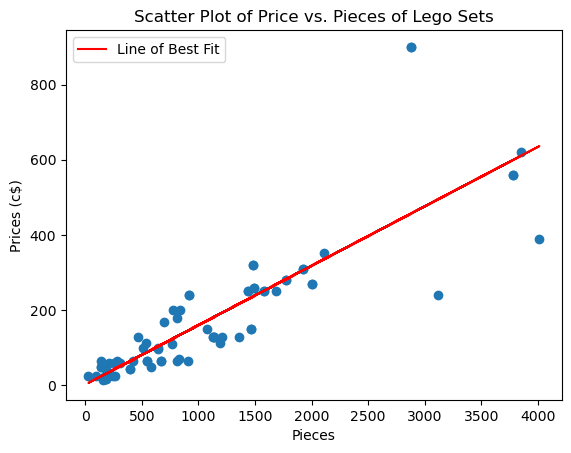

In [14]:
#plotting the scater plot to show the correlation between pieces and pice

plt.scatter(df['pieces'], df['price'])
x = df['pieces']
y = df['price']

coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color = 'red', label = 'Line of Best Fit')

plt.xlabel('Pieces')
plt.ylabel('Prices (c$)')
plt.title('Scatter Plot of Price vs. Pieces of Lego Sets')
plt.legend()

plt.show()

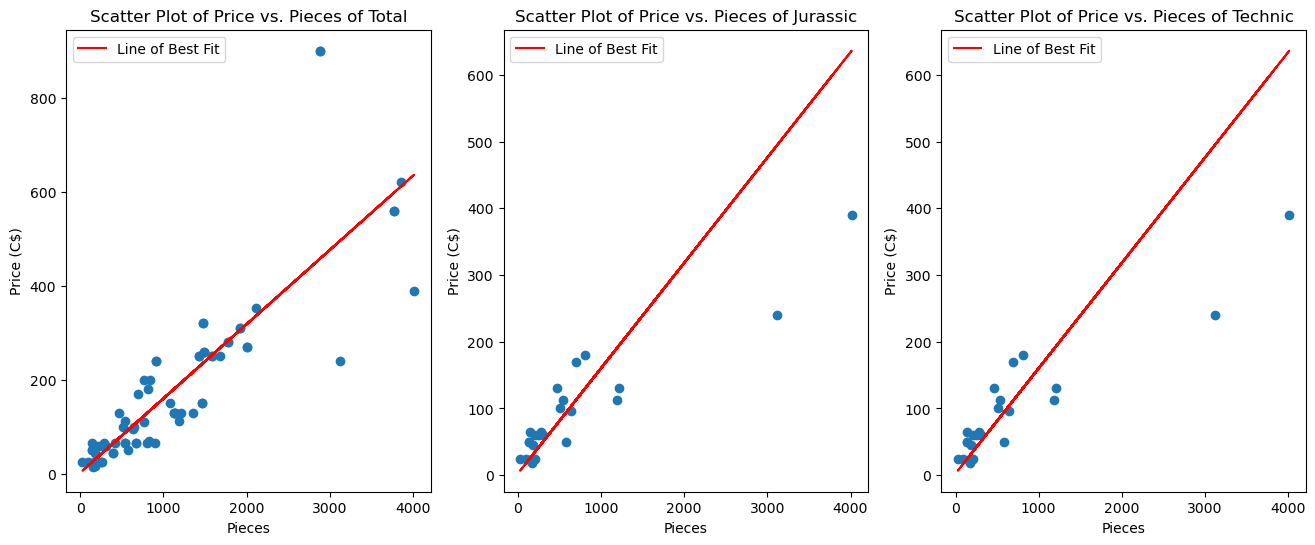

In [15]:
#scatter plot for data sets of two themes and total

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

ax.scatter(df['pieces'], df['price'])
x = df['pieces']
y = df['price']

coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
ax.plot(x, line(x), color = 'red', label = 'Line of Best Fit')

ax.set_xlabel('Pieces')
ax.set_ylabel('Price (C$)')
ax.set_title('Scatter Plot of Price vs. Pieces of Total')
ax.legend()


ax1.scatter(df1['pieces'], df1['price'])
x1 = df['pieces']
y1 = df['price']
coefficients1 = np.polyfit(x1, y1, 1)
line1 = np.poly1d(coefficients1)
ax1.plot(x1, line(x1), color = 'red', label = 'Line of Best Fit')

ax1.set_xlabel('Pieces')
ax1.set_ylabel('Price (C$)')
ax1.set_title('Scatter Plot of Price vs. Pieces of Jurassic')
ax1.legend()

ax2.scatter(df1['pieces'], df1['price'])
x2 = df['pieces']
y2 = df['price']
coefficients2 = np.polyfit(x2, y2, 1)
line2 = np.poly1d(coefficients2)
ax2.plot(x2, line(x2), color = 'red', label = 'Line of Best Fit')

ax2.set_xlabel('Pieces')
ax2.set_ylabel('Price (C$)')
ax2.set_title('Scatter Plot of Price vs. Pieces of Technic')
ax2.legend()

#plt.show()

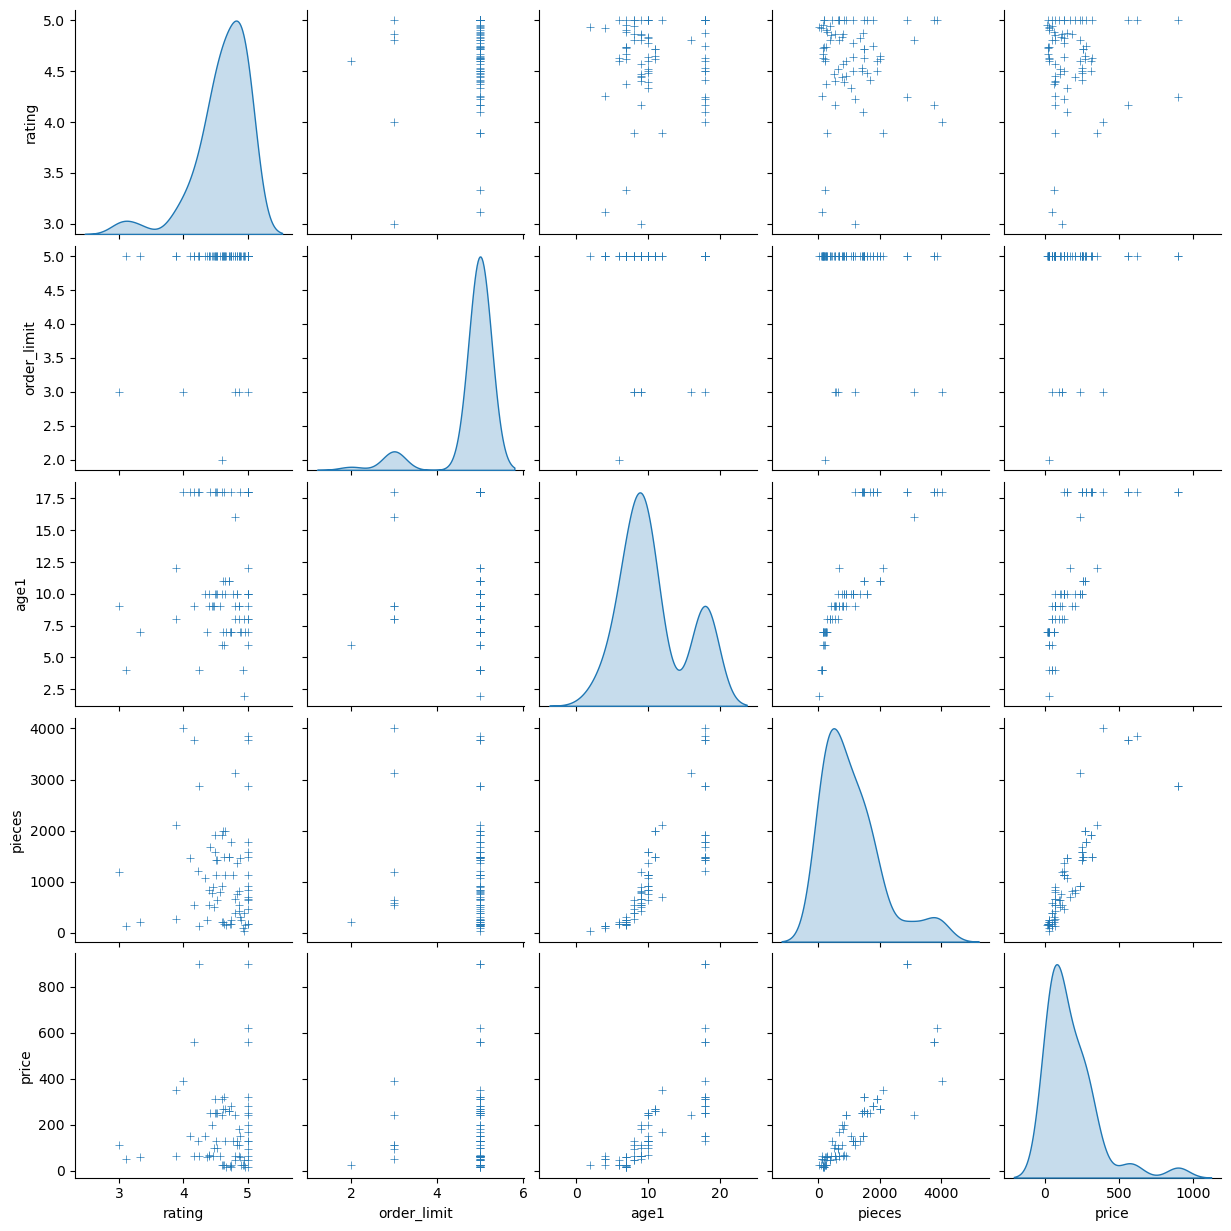

In [16]:
# Find the correlation between variables
#convert column 'id' from int to string
df['id'] = df['id'].astype(str)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df, diag_kind='kde',markers='+')

<Axes: >

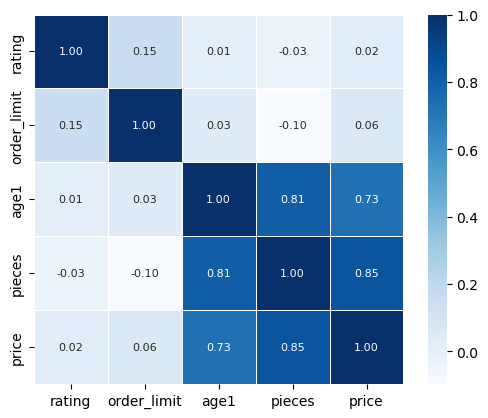

In [17]:
sns.heatmap(df.corr(),annot=True, fmt=".2f", linewidths=0.5, cmap="Blues", cbar=True, square=True, annot_kws={"size": 8})

Text(0.5, 1.0, 'Distribution of Age Range')

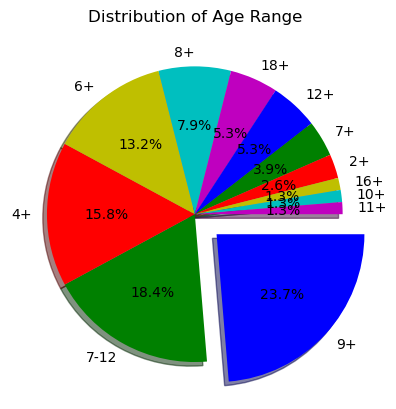

In [18]:
#Percentage
values = list(df['age'].value_counts())
#print (values)
colors = ['b', 'g', 'r','y','c','m']
df['age'].unique()
labels = list(df['age'].unique())
explode = (0.2, 0, 0,0,0,0,0,0,0,0, 0,0)
plt.pie(values, colors=colors, labels=labels,explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Distribution of Age Range')

Text(0.5, 1.0, 'Distribution of Age for Technic')

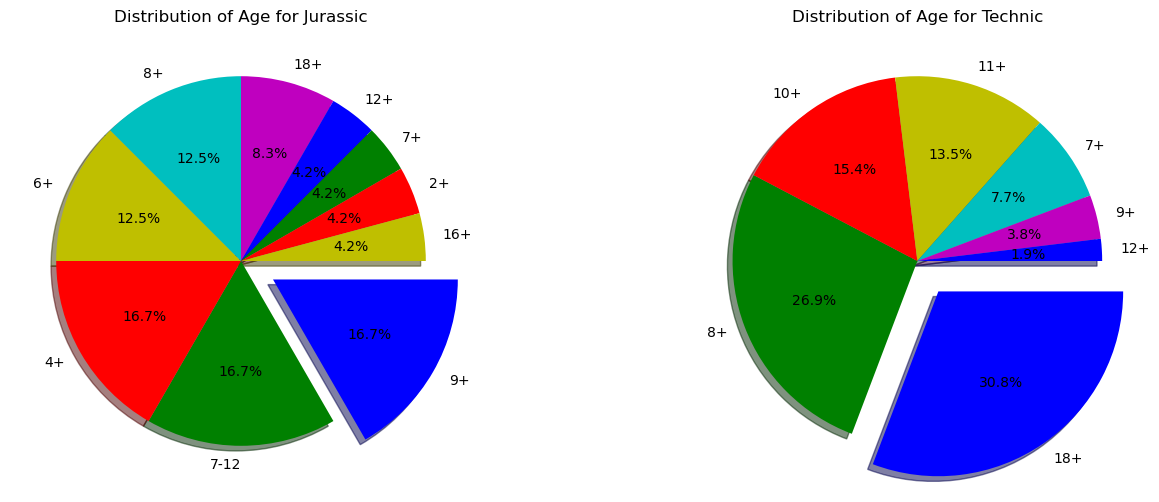

In [19]:
#pie chart for theme Jurassic and Technic
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# ...
values1 = list(df1['age'].value_counts())
#print (values)
colors = ['b', 'g', 'r','y','c','m']
#df1['age'].unique()
labels1 = list(df1['age'].unique())
explode1 = (0.2, 0, 0,0,0,0,0,0,0,0)
axs[0].pie(values1, colors=colors, labels=labels1,explode=explode1, autopct='%1.1f%%', counterclock=False, shadow=True)
axs[0].set_title('Distribution of Age for Jurassic')
#axs[0].pie(values,labels = labels, colors = colors, autopct = '%1.1f%%')
#axs[0].set_title('Gender Composition in 1960')
# ...
values2 = list(df2['age'].value_counts())
#print (values)
colors2 = ['b', 'g', 'r','y','c','m']
#df2['age'].unique()
labels2 = list(df2['age'].unique())
explode2 = (0.2, 0, 0,0,0,0,0)
axs[1].pie(values2, colors=colors2, labels=labels2,explode=explode2, autopct='%1.1f%%', counterclock=False, shadow=True)
axs[1].set_title('Distribution of Age for Technic')
#axs[1].pie(values,labels = labels, colors = colors, autopct = '%1.1f%%')
#axs[1].set_title('Gender Composition in 2016')

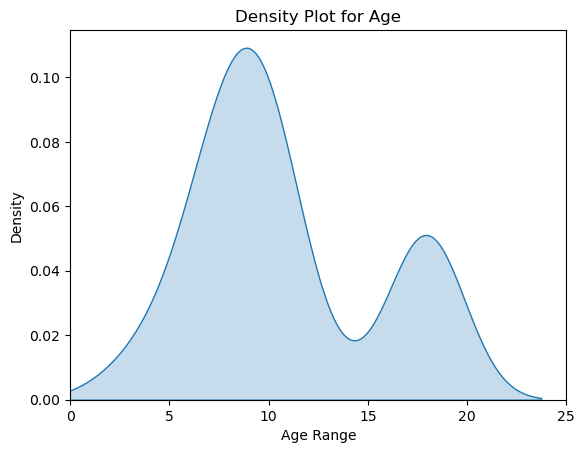

In [23]:
#Density plot of Age
sns.kdeplot(df['age1'], shade=True)
plt.xlabel('Age Range')
plt.ylabel('Density')
plt.title('Density Plot for Age')
plt.xlim([0, 25])
# Show the plot
plt.show()

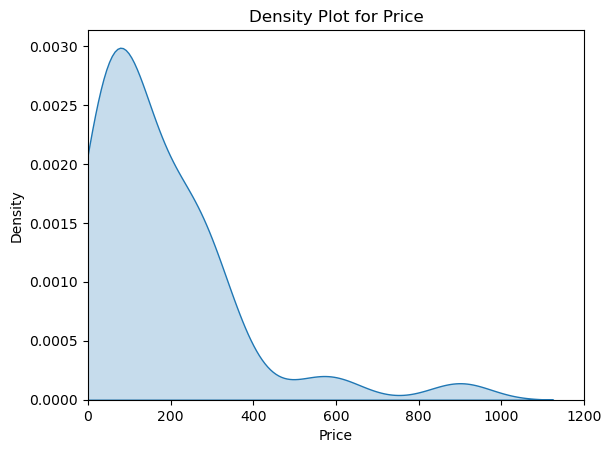

In [24]:
#Density plot of Price
sns.kdeplot(df['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot for Price')
plt.xlim([0, 1200])
# Show the plot
plt.show()

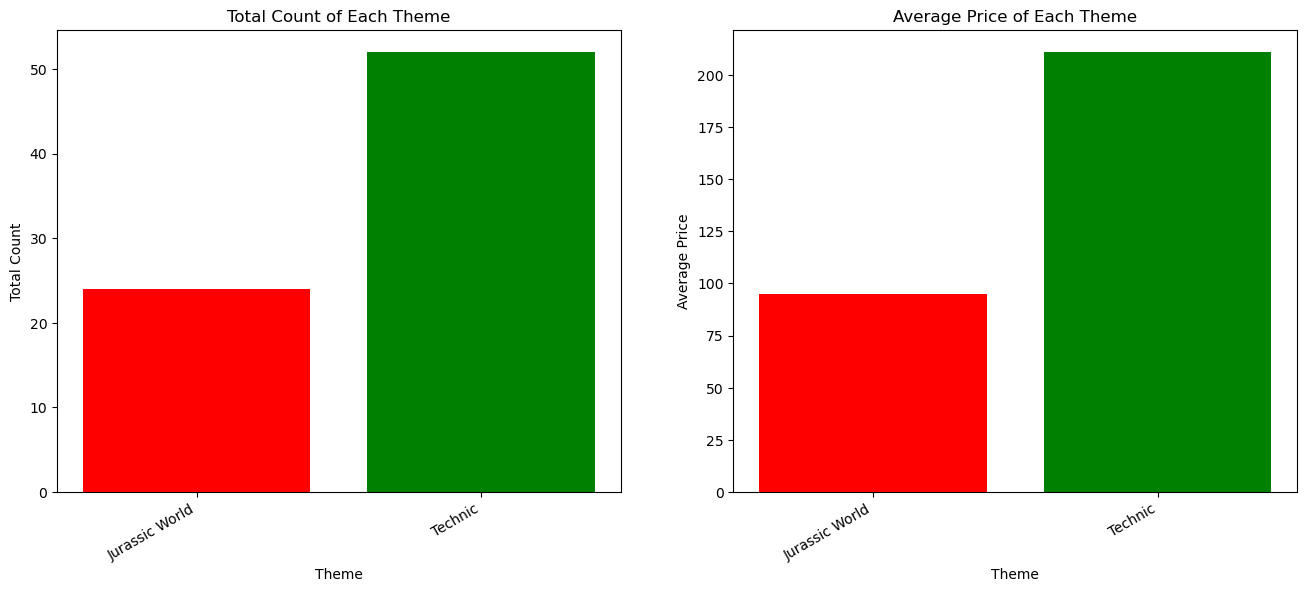

In [25]:
# Plotting the bar graph to get the count for each theme
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

counts = [df['theme'].value_counts()['Jurassic World'], df['theme'].value_counts()['Technic']]
labels1 = ['Jurassic World', 'Technic']
color = ['red', 'green']

axs[0].bar(labels1, counts, color = color)

# Customize the plot
axs[0].set_xlabel('Theme')
axs[0].set_ylabel('Total Count')
axs[0].set_title('Total Count of Each Theme')
axs[0].set_xticklabels(labels1, rotation=30, ha = 'right')

avg_price = list(df.groupby('theme')['price'].mean())
labels2 = ['Jurassic World', 'Technic']

axs[1].bar(labels2, avg_price, color = color)

# Customize the plot
axs[1].set_xlabel('Theme')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price of Each Theme')
axs[1].set_xticklabels(labels1, rotation=30, ha = 'right')

# Show the plot
plt.show()

<Axes: title={'center': 'price'}, xlabel='theme'>

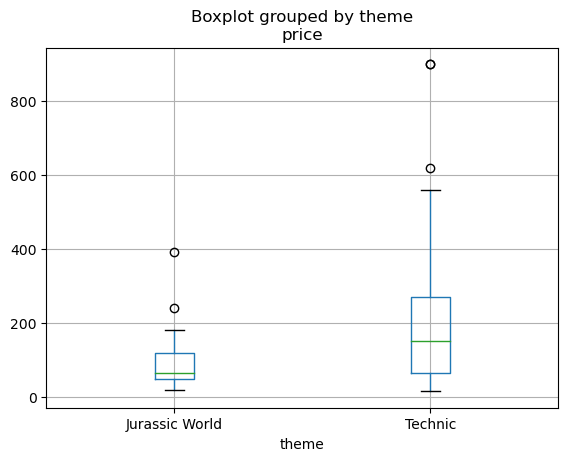

In [26]:
# boxplot
df.boxplot(column='price',by='theme')

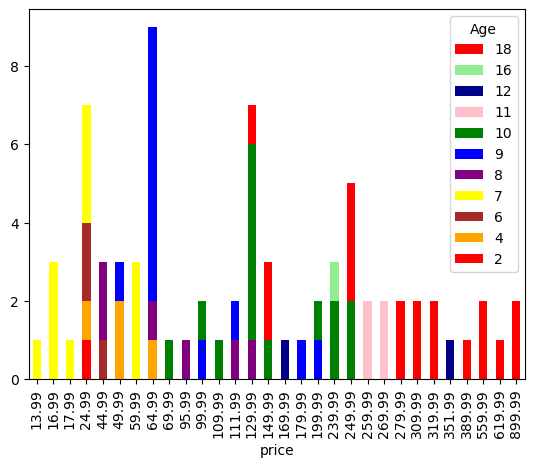

In [27]:
#stacked column chart
data = pd.crosstab(df['price'],df['age1'])
ax = data.plot(kind='bar',stacked=True,color=['red','orange','brown','yellow','purple','blue','green','pink','darkblue','lightgreen','red'],grid=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', title = 'Age') 

<Axes: xlabel='price'>

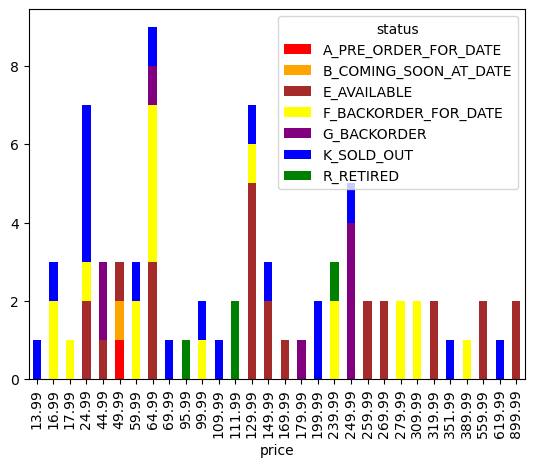

In [31]:
#stacked column chart
data = pd.crosstab(df['price'],df['status'])
data.plot(kind='bar',stacked=True,color=['red','orange','brown','yellow','purple','blue','green','pink','darkblue','lightgreen','red'],grid=False)

# Conclusion

There is a very strong positive correlation between price and pieces or age and pieces. From the scatter plot of Price vs. Pieces, it is also shown the price will increase with pieces count. The heatmap confirmed this correlation as well. 

From the pie charts, it is shown the most products are for ages from 6 to 16. People whose age are in this range are more likely to play Lego. This is proved by the visual of Density plot for Age.

The Density plot for Price tells us that most Lego products are selling for the price under CAD 400 and some of them are selling under CAD 1,000.

Compared with the theme of Jurassic World, the theme of Technic has more kinds of products and higher average price. For both the theme of Jurassic World and Technic, the price has a positive change with the increase of pieces count.
